In [28]:
import random 
import math

Input_Neurons = ["Age", "Rnd", "Lx", "Ly", "BDx", "BDy", "Bn", "Bs", "Be", "Bw"]
Output_Neurons = ["Mn", "Ms", "Me", "Mw", "Mrn", "Internal_Neuron"]
Output_Neurons_NO_INTERNAL = ["Mn", "Ms", "Me", "Mw", "Mrn"]
#Parameters:
Grid_Size = 100
Steps = 300
Genome_Length = 8
Internal_Neurons = 1 
Mutation_Rate = 0 #1/200
Pop_Size = 300
Current_Gen = {}
Current_Step = 0

In [29]:
#Generate locations:

def Generate_Coords():
    while True:
        x = random.randint(0, Grid_Size)
        y = random.randint(0, Grid_Size)
        Location = [x, y]
        if Location in All_Coords:
            continue
        else:
            X_Coords.append(x)
            Y_Coords.append(y)
            All_Coords.append(Location)
            break

    return x, y

def Loc_Occupied(X, Y):
    Location = [X, Y]
    if Location in All_Coords:
        return True
    else:
        return False

In [30]:
#Input functions:

def Age(Pop_Num, Step):
    output = round((Step / Steps), 2)
    return output

def Rnd(Pop_Num, Step):
    output = round(random.uniform(0,1), 2)
    return output

def Lx(Pop_Num, Step):
    output = round((Current_Gen[Pop_Num]["X"] / Grid_Size), 2)
    return output

def Ly(Pop_Num, Step):
    output = round((Current_Gen[Pop_Num]["Y"] / Grid_Size), 2)
    return output

def BDx(Pop_Num, Step):
    if Current_Gen[Pop_Num]["X"] < (Grid_Size / 2):
        output = round((Current_Gen[Pop_Num]["X"] / (Grid_Size / 2)), 2)
    else:
        output = round(((Current_Gen[Pop_Num]["X"] - Grid_Size / 2) / (Grid_Size / 2)), 2)
    return output

def BDy(Pop_Num, Step):
    if Current_Gen[Pop_Num]["Y"] < (Grid_Size / 2):
        output = round((Current_Gen[Pop_Num]["Y"] / (Grid_Size / 2)), 2)
    else:
        output = round(((Current_Gen[Pop_Num]["Y"] - Grid_Size / 2) / (Grid_Size / 2)), 2)
    return output

def Bn(Pop_Num, Step):
    if Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]+1) == False:
        output = 1
    else:
        output = 0
    return output

def Bs(Pop_Num, Step):
    if Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]-1) == False:
        output = 1
    else:
        output = 0
    return output
    
def Be(Pop_Num, Step):
    if Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]+1) == False:
        output = 1
    else:
        output = 0
    return output
    
def Bw(Pop_Num, Step):
    if Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]-1) == False:
        output = 1
    else:
        output = 0
    return output

#Internal neuron:

def Internal_Neuron(Pop_Num, Inputs):
    output = math.tanh(sum(Inputs))
    return output

In [31]:
#Output neurons:

def Mn(Pop_Num, Inputs):
    if math.tanh(sum(Inputs)) >= 0 and (Current_Gen[Pop_Num]["X"] + 1) <= Grid_Size and Loc_Occupied(Current_Gen[Pop_Num]["X"]+1, Current_Gen[Pop_Num]["Y"]) == False:
        Current_Gen[Pop_Num]["X"] += 1

def Ms(Pop_Num, Inputs):
    if math.tanh(sum(Inputs)) >= 0 and (Current_Gen[Pop_Num]["X"] - 1) >= 0 and Loc_Occupied(Current_Gen[Pop_Num]["X"]-1, Current_Gen[Pop_Num]["Y"]) == False:
        Current_Gen[Pop_Num]["X"] -= 1

def Me(Pop_Num, Inputs):
    if math.tanh(sum(Inputs)) >= 0 and (Current_Gen[Pop_Num]["Y"] + 1) <= Grid_Size and Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]+1) == False:
        Current_Gen[Pop_Num]["Y"] += 1

def Mw(Pop_Num, Inputs):
    if math.tanh(sum(Inputs)) >= 0 and (Current_Gen[Pop_Num]["Y"] - 1) >= 0 and Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]-1) == False:
        Current_Gen[Pop_Num]["Y"] -= 1


def Mrn(Pop_Num, Inputs):
    if math.tanh(sum(Inputs)) >= 0:
        dice = random.randint(0,3)
        if dice == 0 and Loc_Occupied(Current_Gen[Pop_Num]["X"]+1, Current_Gen[Pop_Num]["Y"]) == False and (Current_Gen[Pop_Num]["X"] + 1) <= Grid_Size:
            Current_Gen[Pop_Num]["X"] += 1

        elif dice == 1 and Loc_Occupied(Current_Gen[Pop_Num]["X"]-1, Current_Gen[Pop_Num]["Y"]) == False and (Current_Gen[Pop_Num]["X"] - 1) >= 0:
            Current_Gen[Pop_Num]["X"] -= 1

        elif dice == 2 and Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]+1) == False and (Current_Gen[Pop_Num]["Y"] + 1) <= Grid_Size:
            Current_Gen[Pop_Num]["Y"] += 1

        elif dice == 3 and Loc_Occupied(Current_Gen[Pop_Num]["X"], Current_Gen[Pop_Num]["Y"]-1) == False and (Current_Gen[Pop_Num]["Y"] - 1) >= 0:
            Current_Gen[Pop_Num]["Y"] -= 1
 

In [32]:

#Creating and running gens:

def New_Gen(Barrier):
    global X_Coords 
    X_Coords = []
    global Y_Coords
    Y_Coords = []
    global All_Coords 
    All_Coords = []
    if Barrier == 1:
        for i in range(int(0.2*Grid_Size), int(0.8*Grid_Size)):
            X_Coords.append(int(0.2*Grid_Size))
            Y_Coords.append(i)
            All_Coords.append([int(0.2*Grid_Size), i])

    if Current_Gen == {}:
        for i in range(Pop_Size):
            Current_Gen[i] = {}
            Coords = list(Generate_Coords())
            Current_Gen[i]["X"] = Coords[0]
            Current_Gen[i]["Y"] = Coords[1]
            Current_Gen[i]["NN"] = {}
            for j in range(Genome_Length):
                Current_Gen[i]["NN"][random.choice(Input_Neurons)] = [random.choice(Output_Neurons), (round(random.uniform(-4, 4), 2))]
            Current_Gen[i]["NN"]["Internal_Neuron"] = [random.choice(Output_Neurons_NO_INTERNAL), (round(random.uniform(-4, 4), 2))]
            Current_Gen[i]["Mutation"] = 0
    else:
        for i in range(Pop_Size):
            if i in Current_Gen:
                Coords = list(Generate_Coords())
                Current_Gen[i]["X"] = Coords[0]
                Current_Gen[i]["Y"] = Coords[1]
                if Mutation_Rate != 0:
                    for j in range(Genome_Length):
                        dice = random.randint(0,Mutation_Rate)
                        if dice == Mutation_Rate // 2:
                            Current_Gen[i]["NN"][random.choice(list(Current_Gen[i]["NN"]))] = [random.choice(Output_Neurons), (round(random.uniform(-4, 4), 2))]
                            Current_Gen[i]["Mutation"] = 1
            else:
                Current_Gen[i] = {}
                Coords = list(Generate_Coords())
                Current_Gen[i]["X"] = Coords[0]
                Current_Gen[i]["Y"] = Coords[1]
                Current_Gen[i]["NN"] = {}
                for j in range(Genome_Length):
                    Current_Gen[i]["NN"][random.choice(Input_Neurons)] = [random.choice(Output_Neurons), (round(random.uniform(-4, 4), 2))]
                Current_Gen[i]["NN"]["Internal_Neuron"] = [random.choice(Output_Neurons_NO_INTERNAL), (round(random.uniform(-4, 4), 2))]
                Current_Gen[i]["Mutation"] = 0

In [33]:
#Execute neurons
def Execute_Neurons():
    global Current_Step
    for i in Current_Gen:
        Internal_Input = 0
        for j in Current_Gen[i]["NN"]:
            if j == "Internal_Neuron": 
                output = eval(j + "(" + str(i) + ", " + str([Internal_Input*Current_Gen[i]["NN"][j][1]]) + ")")
            else:
                output = eval(j + "(" + str(i) + ", " + str(Current_Step) + ")")
            if Current_Gen[i]["NN"][j][0] == "Internal_Neuron":
                Internal_Input += eval(Current_Gen[i]["NN"][j][0] + "(" + str(i) + ", " + str([output*Current_Gen[i]["NN"][j][1]]) + ")")
            else:
                eval(Current_Gen[i]["NN"][j][0] + "(" + str(i) + ", " + str([output*Current_Gen[i]["NN"][j][1]]) + ")")
    Current_Step += 1


In [34]:
#GRAPHICS
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.animation import FuncAnimation
def Create_Map(Barrier):
    global fig
    fig = plt.figure()
    global ax
    ax = fig.add_subplot(1, 1, 1)
    x = []
    y = []
    for i in Current_Gen:
        x.append(Current_Gen[i]["X"])
        y.append(Current_Gen[i]["Y"])

    major_ticks = np.arange(0, 101, 20)
    minor_ticks = np.arange(0, 101, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    if Barrier == 1:
        plt.vlines(x=20, ymin = 20, ymax = 80, color="r")
    plt.scatter(x, y)
    plt.show()


In [35]:
#SURVIVAL OF THE FITTEST
def Kill_Noobs():
    Dead_Ones = []
    for i in Current_Gen:
        if Current_Gen[i]["X"] > 15:
          Dead_Ones.append(i)  
    for i in Dead_Ones:
        del Current_Gen[i]

GEN 0


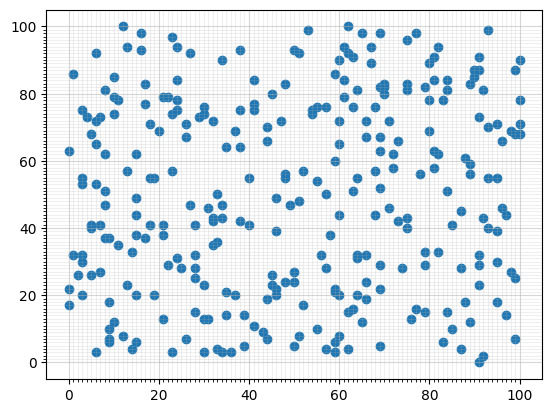

STEP 150


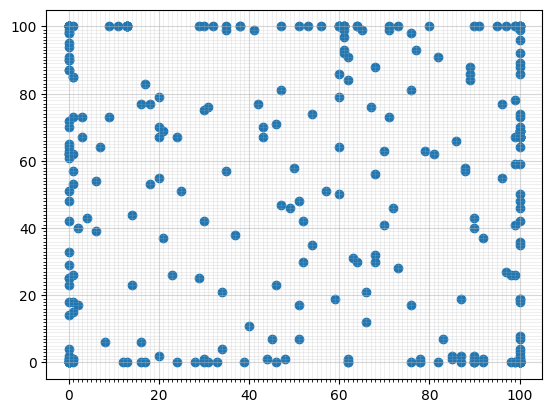

STEP 299


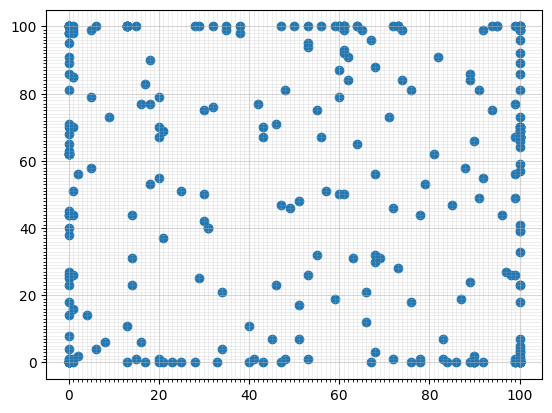

GEN 5


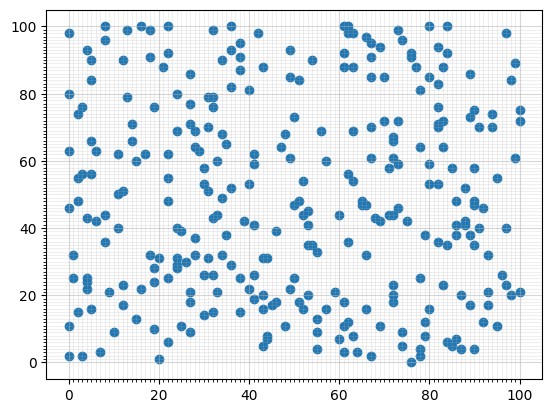

STEP 150


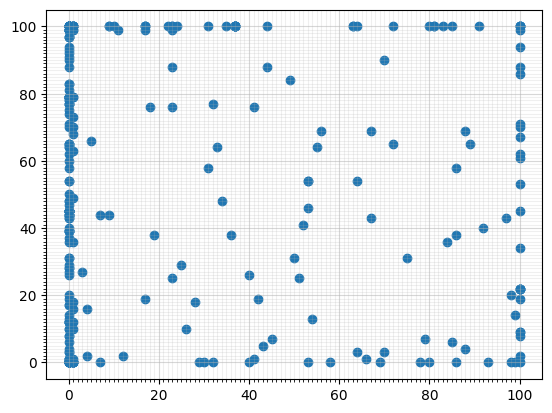

STEP 299


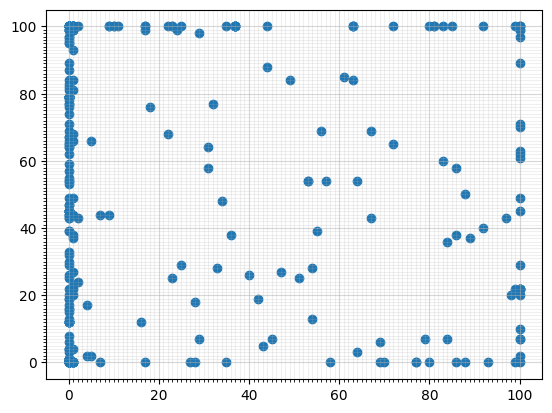

GEN 10


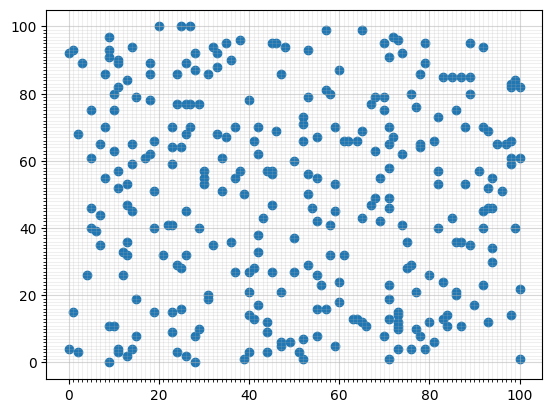

STEP 150


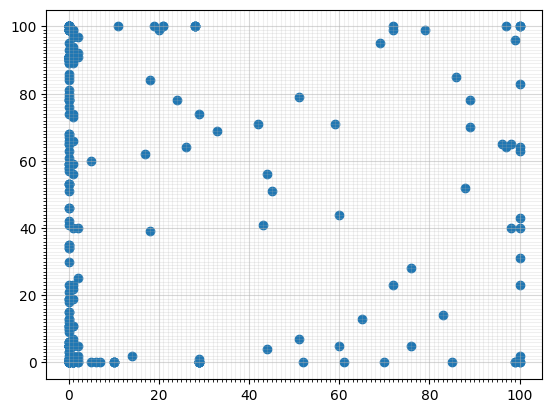

STEP 299


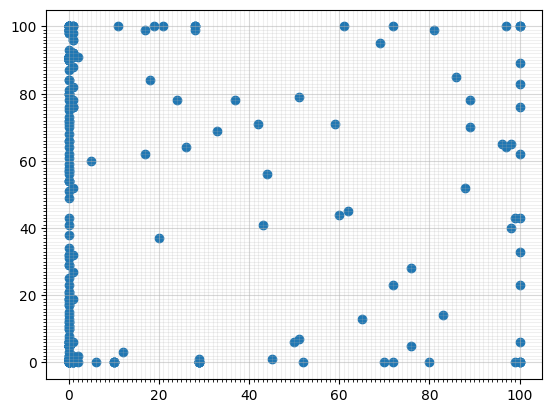

GEN 15


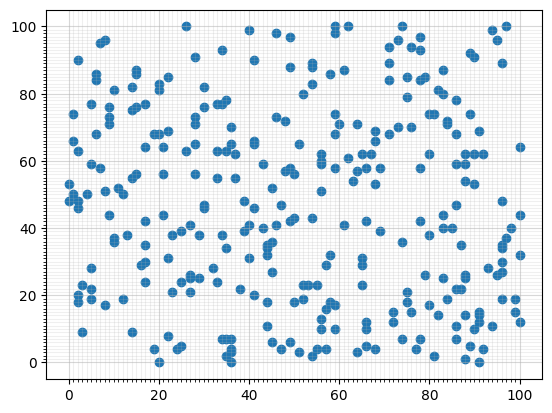

STEP 150


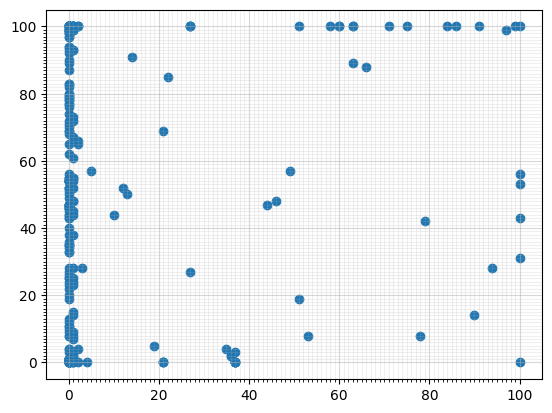

STEP 299


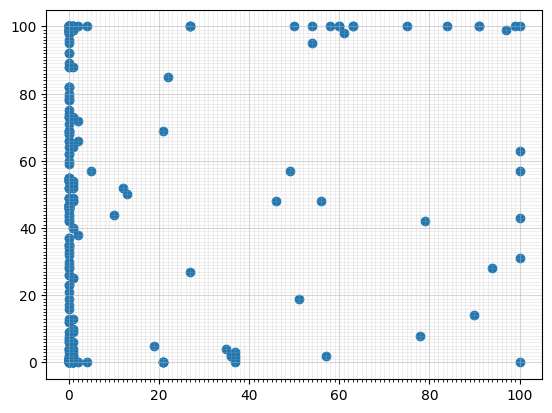

GEN 20


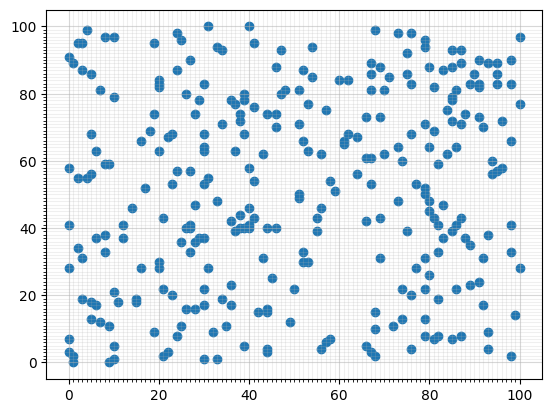

STEP 150


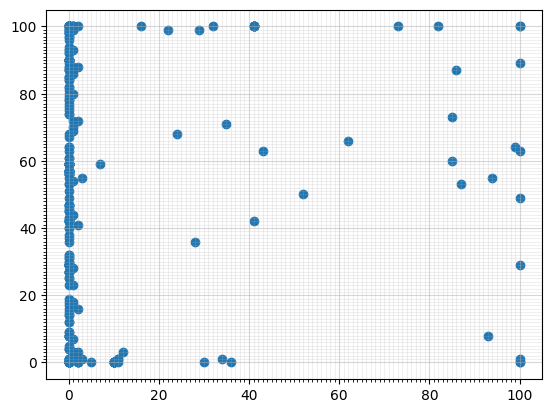

STEP 299


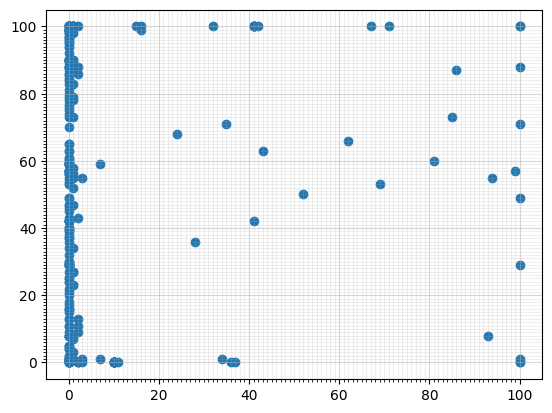

GEN 25


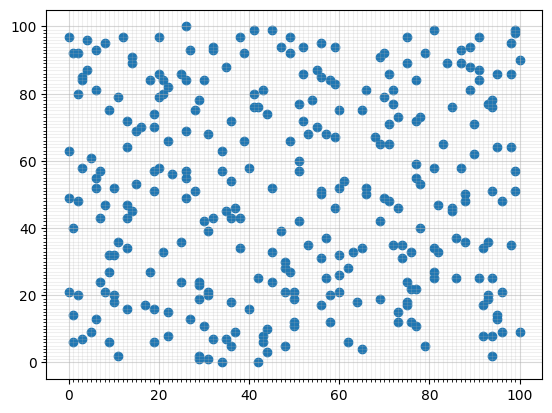

STEP 150


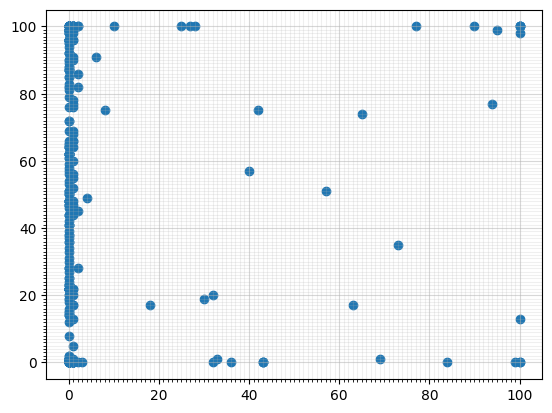

STEP 299


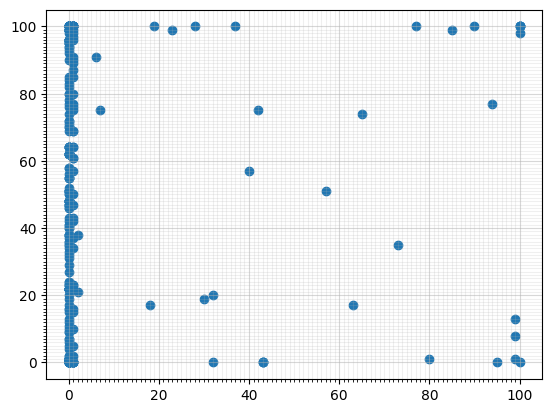

GEN 30


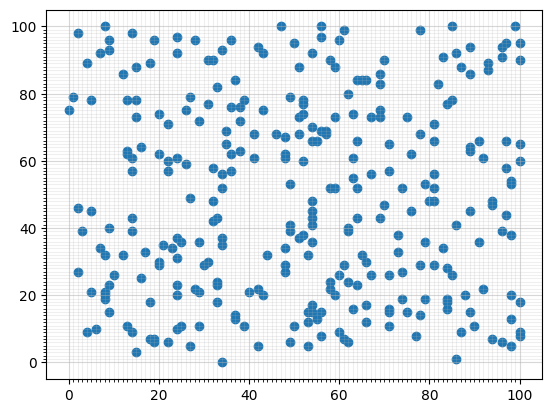

STEP 150


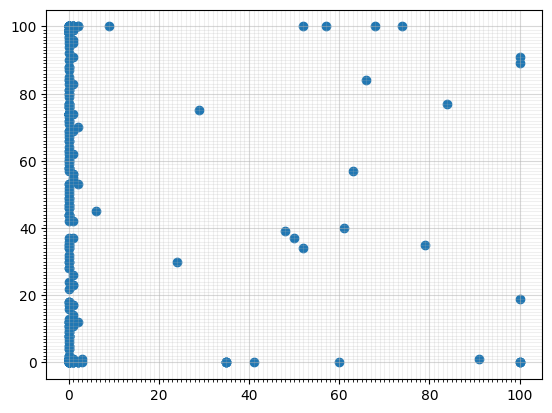

STEP 299


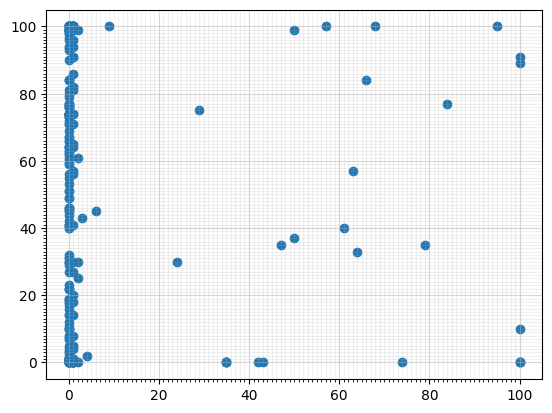

GEN 35


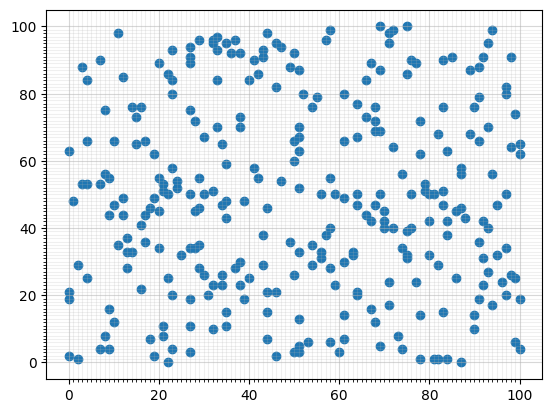

STEP 150


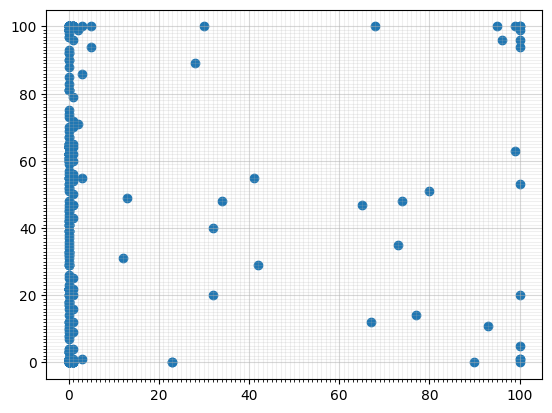

STEP 299


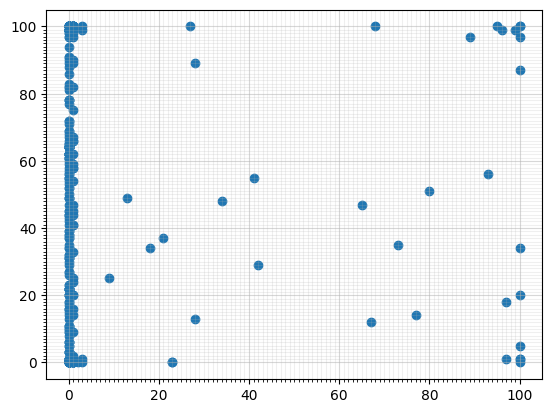

GEN 40


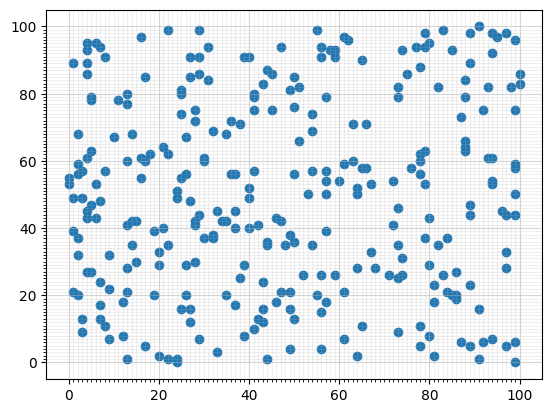

STEP 150


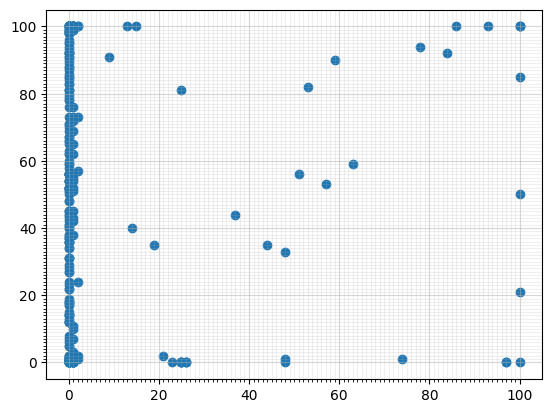

STEP 299


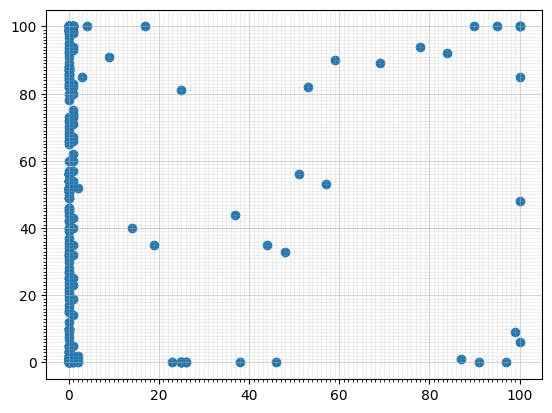

GEN 45


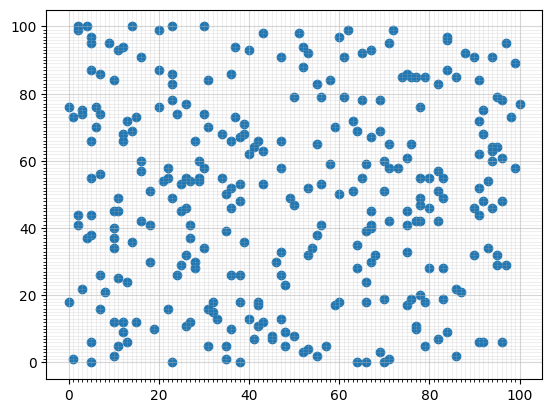

STEP 150


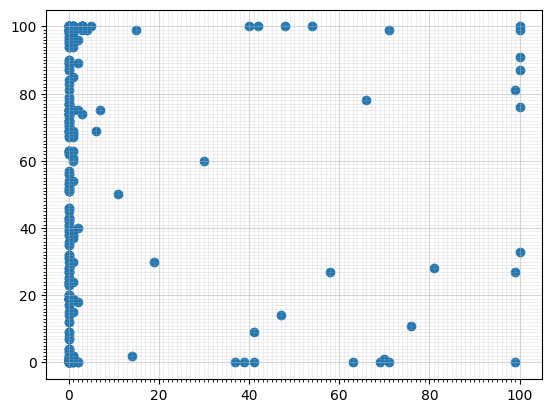

STEP 299


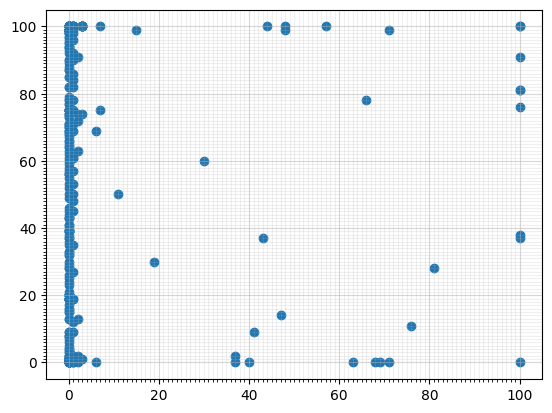

GEN 50


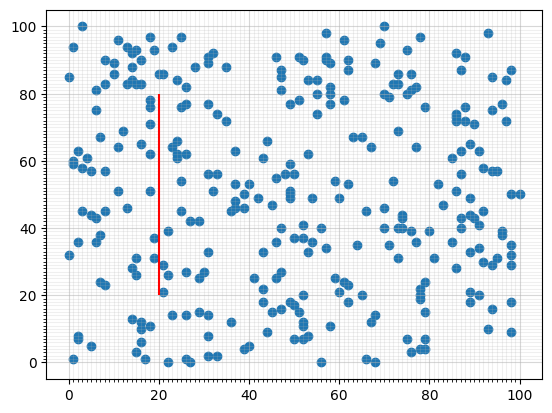

STEP 150


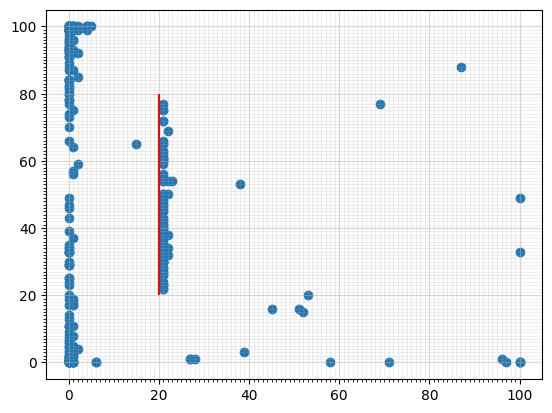

STEP 299


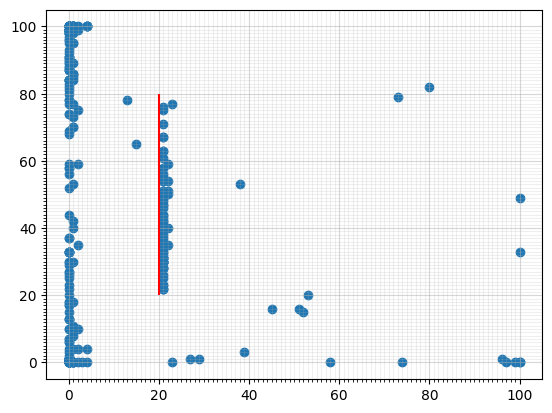

GEN 55


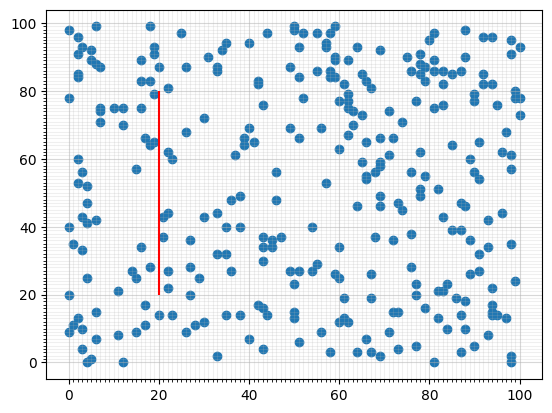

STEP 150


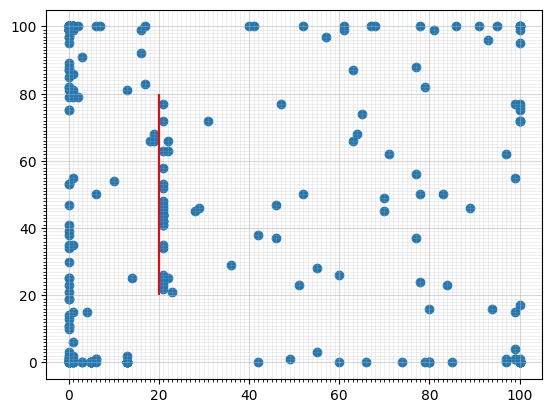

STEP 299


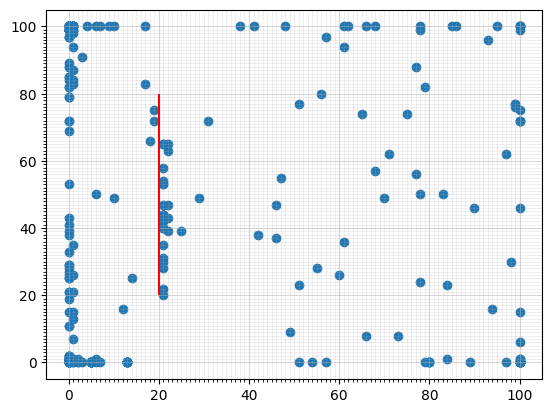

GEN 60


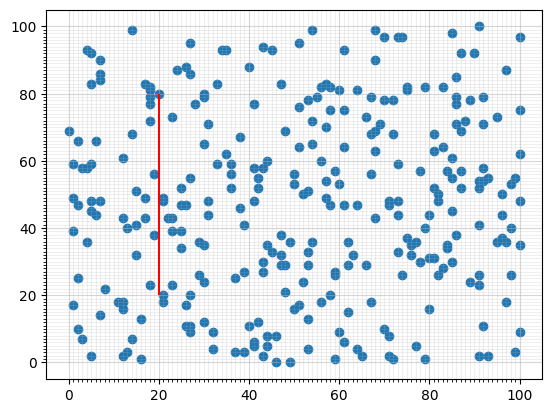

STEP 150


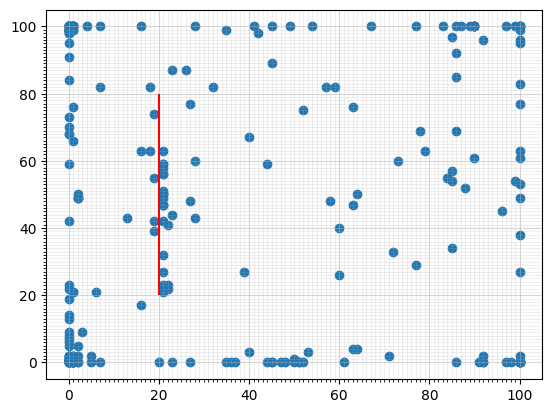

STEP 299


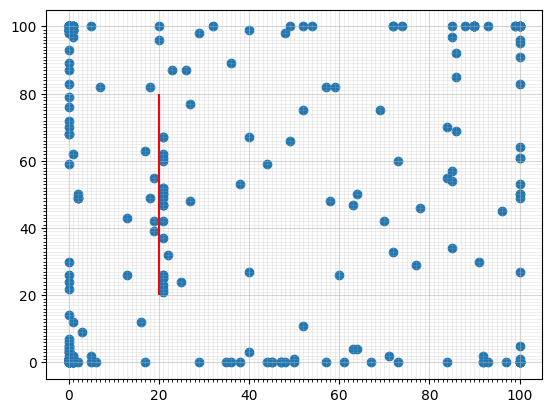

GEN 65


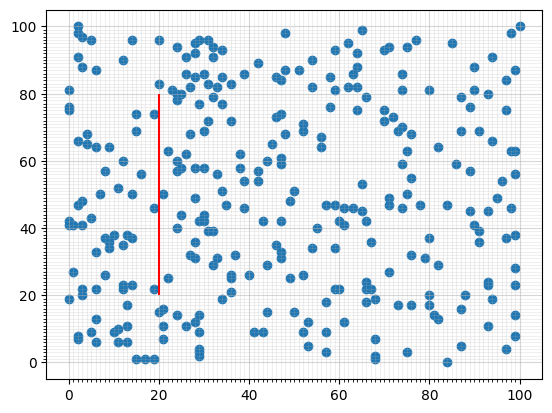

STEP 150


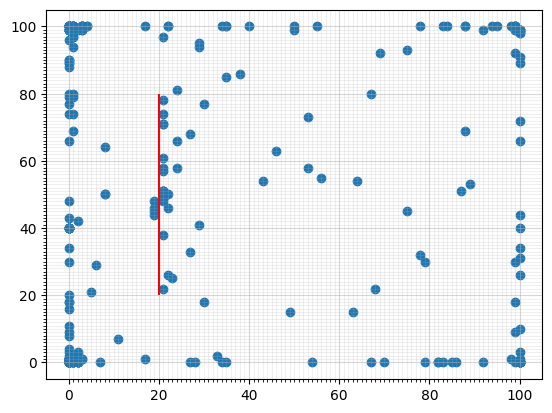

STEP 299


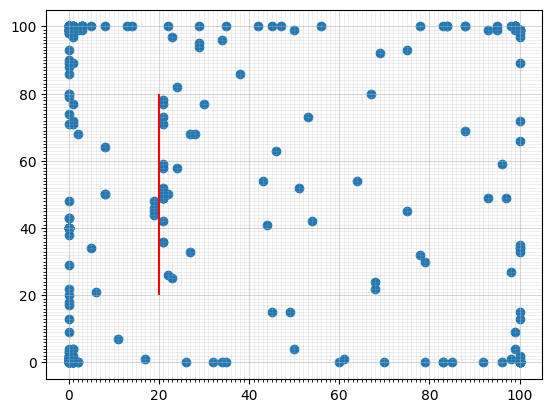

GEN 70


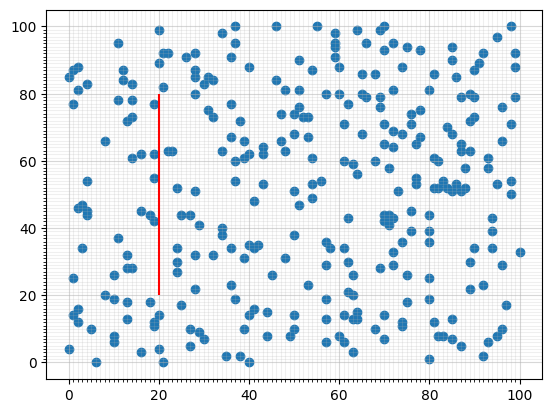

STEP 150


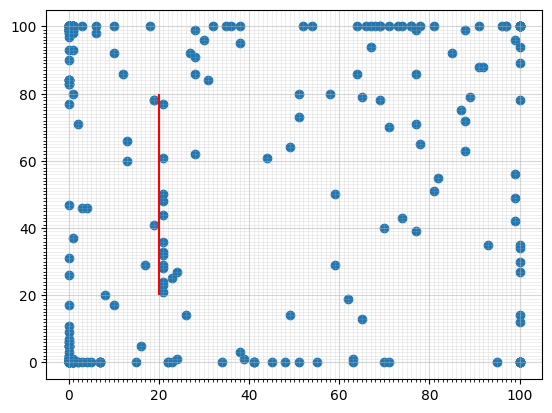

STEP 299


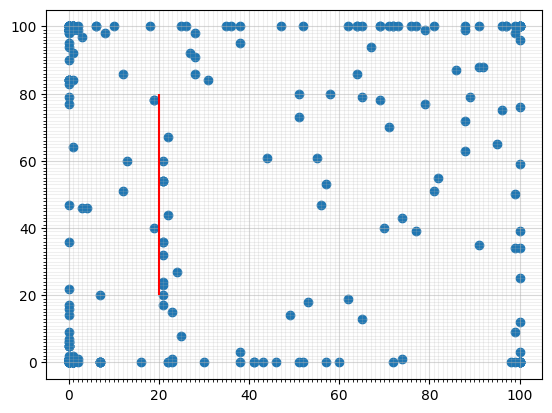

GEN 75


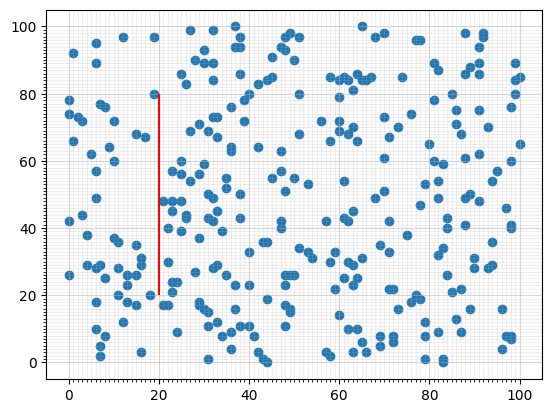

STEP 150


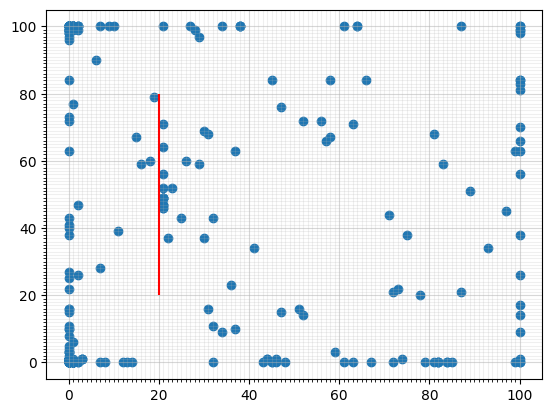

STEP 299


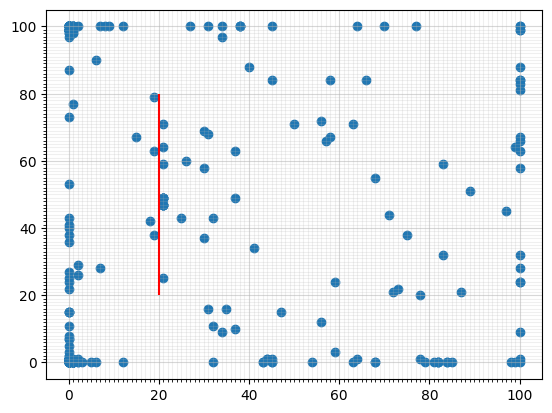

GEN 80


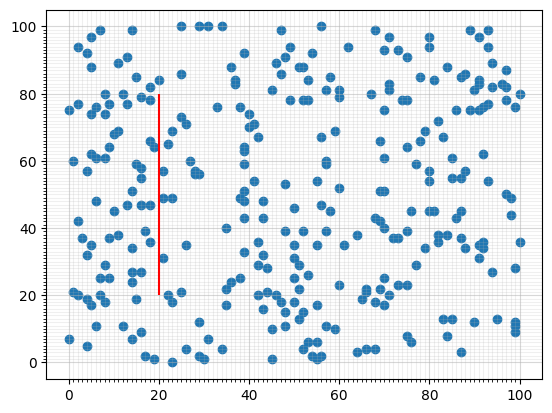

STEP 150


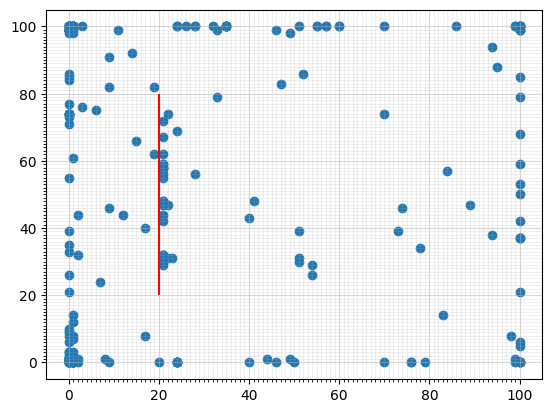

STEP 299


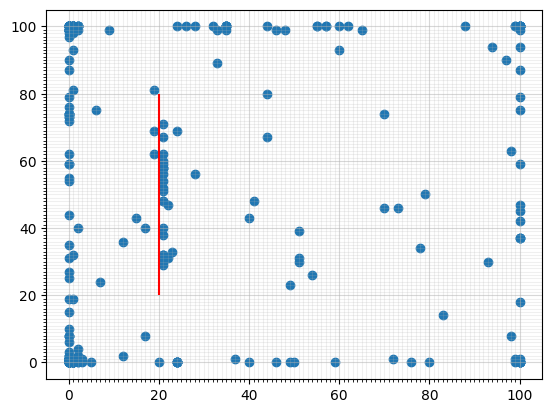

GEN 85


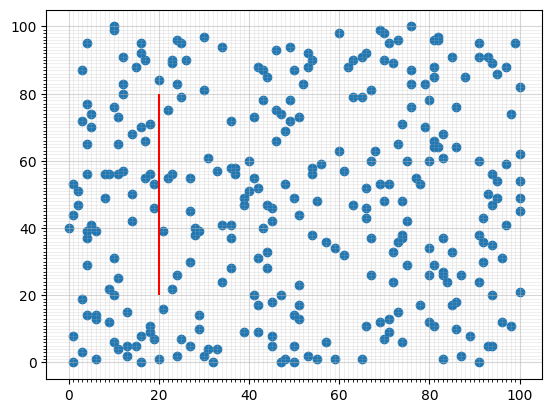

STEP 150


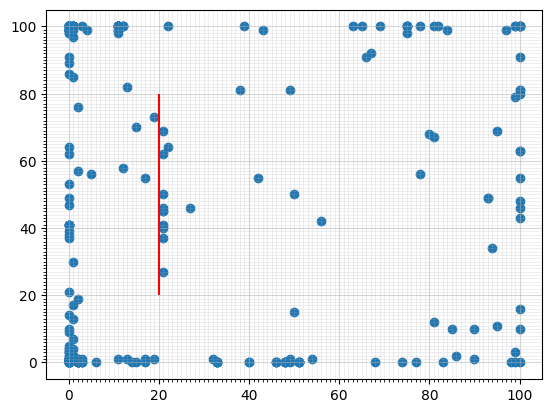

STEP 299


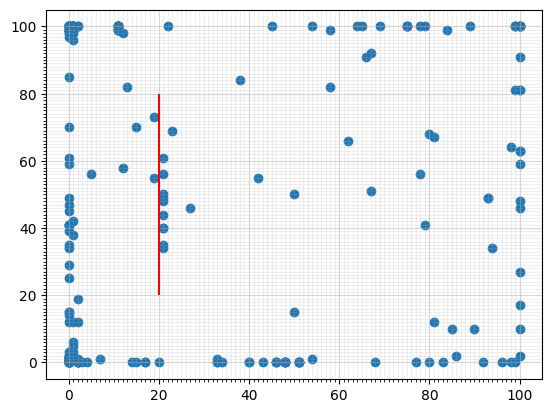

GEN 90


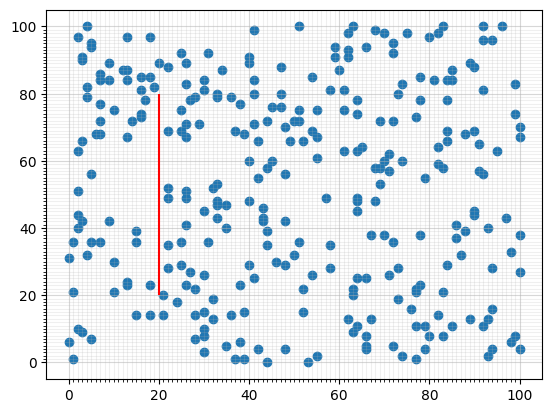

STEP 150


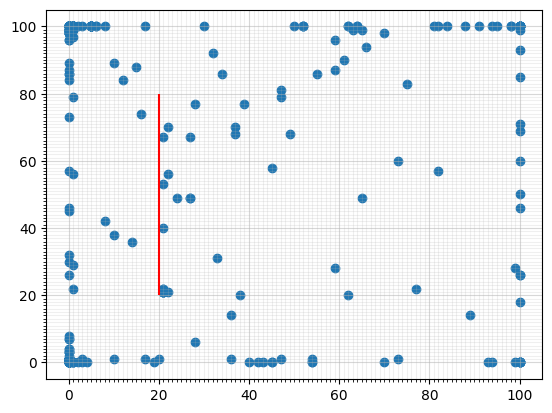

STEP 299


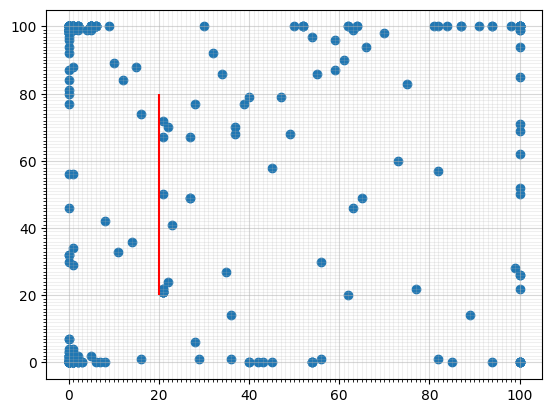

GEN 95


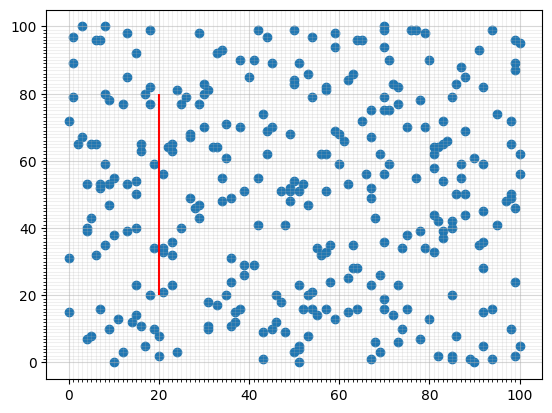

STEP 150


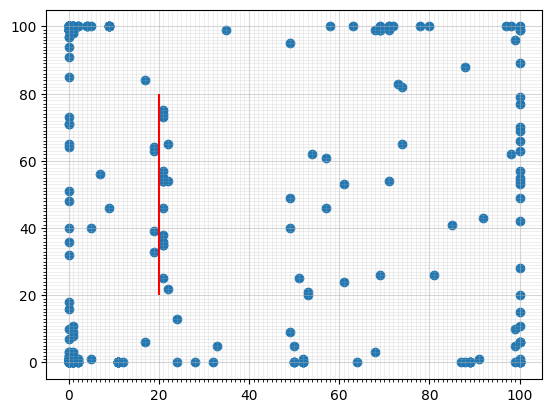

STEP 299


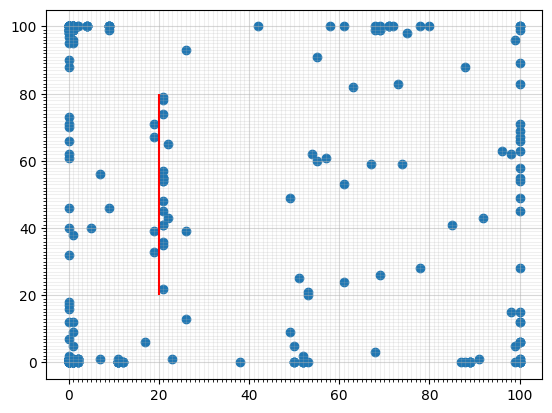

GEN 100


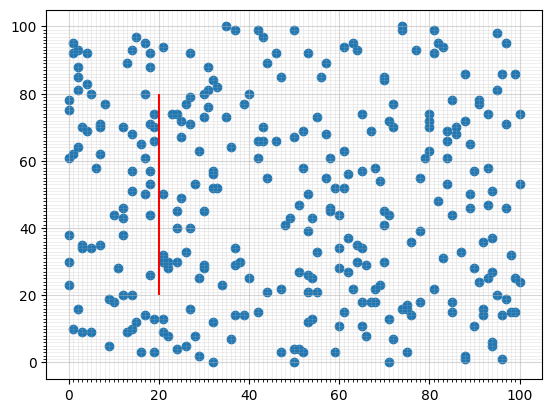

STEP 150


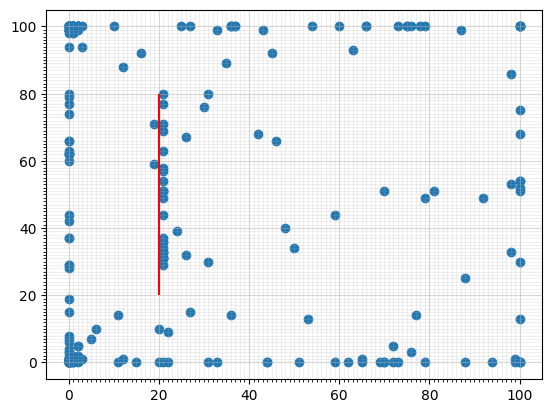

STEP 299


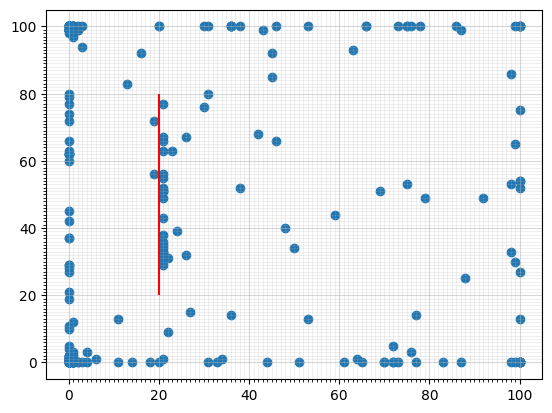

GEN 105


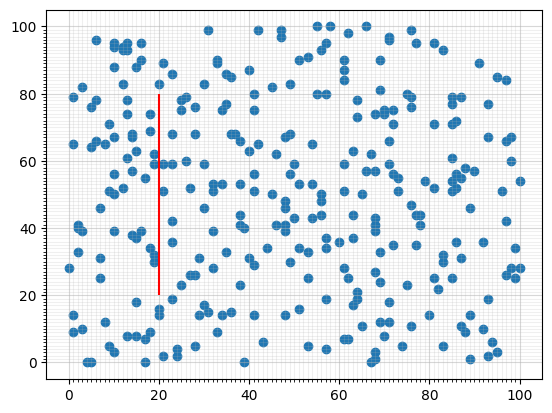

STEP 150


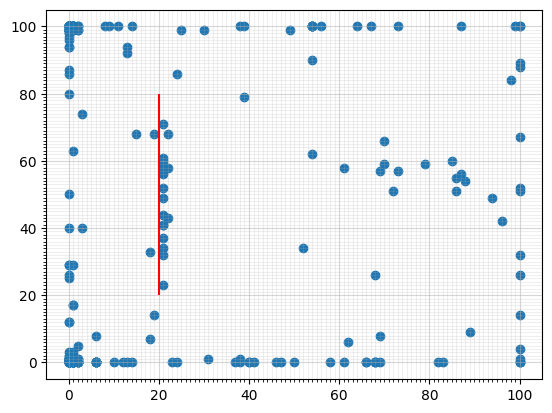

STEP 299


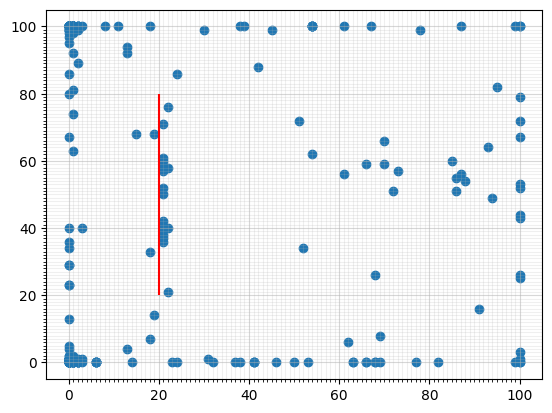

GEN 110


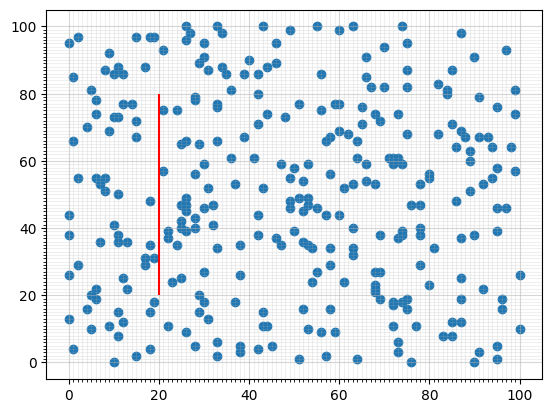

STEP 150


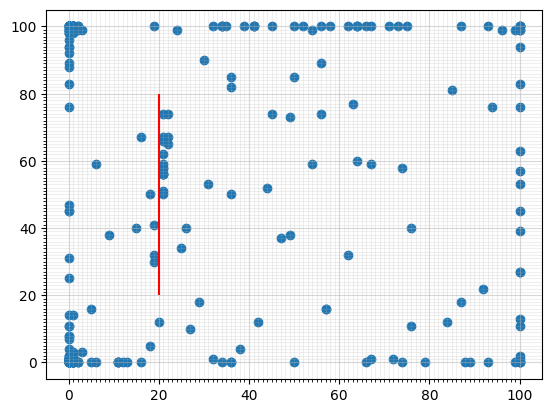

STEP 299


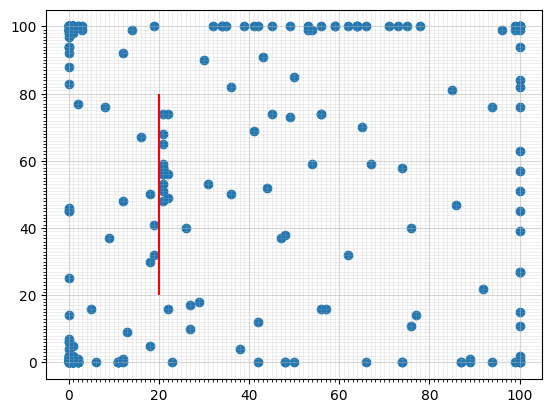

GEN 115


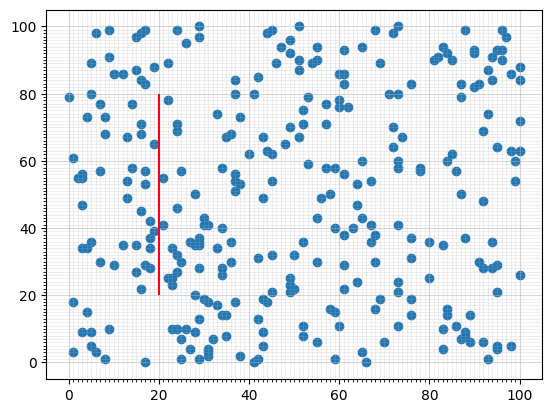

STEP 150


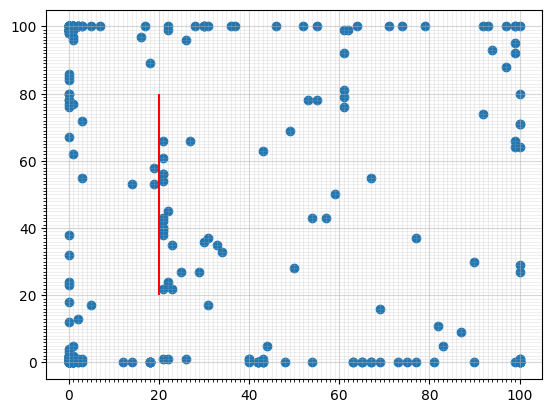

STEP 299


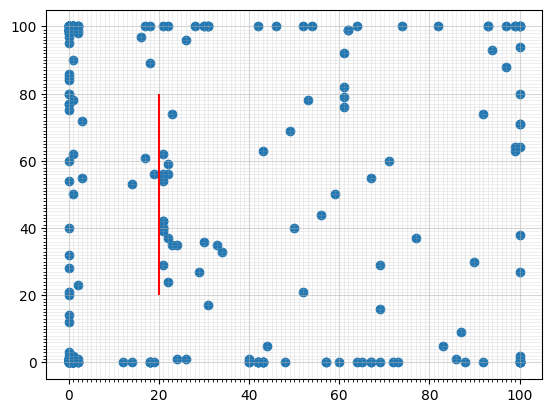

GEN 120


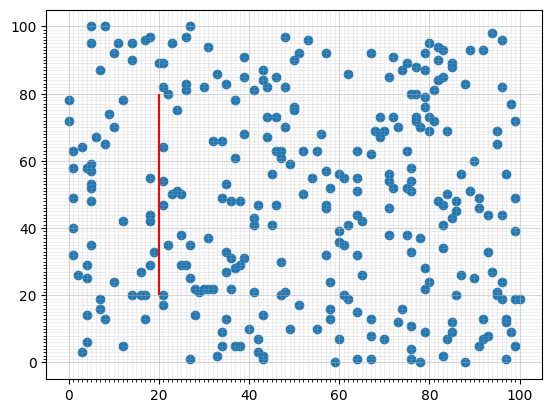

STEP 150


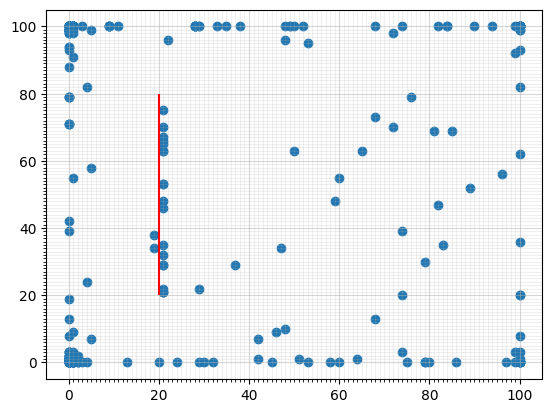

STEP 299


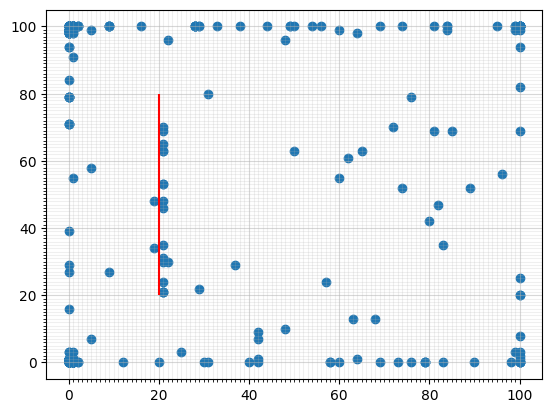

GEN 125


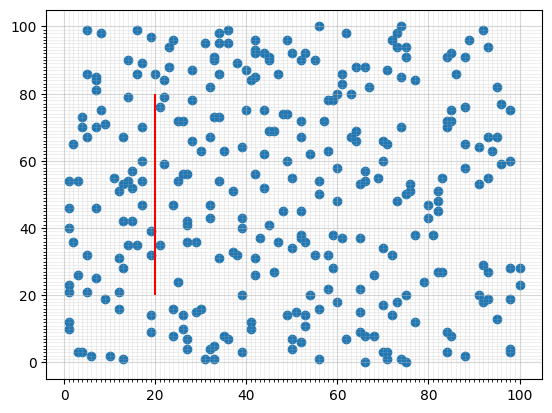

STEP 150


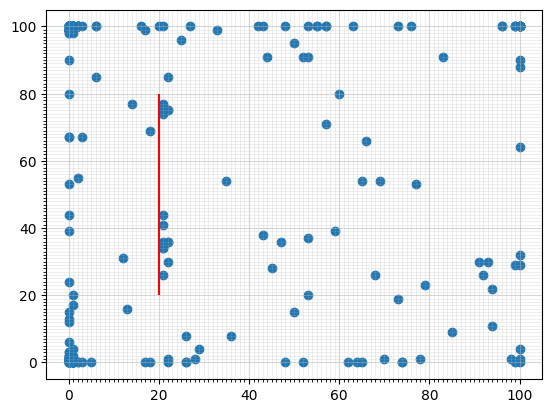

STEP 299


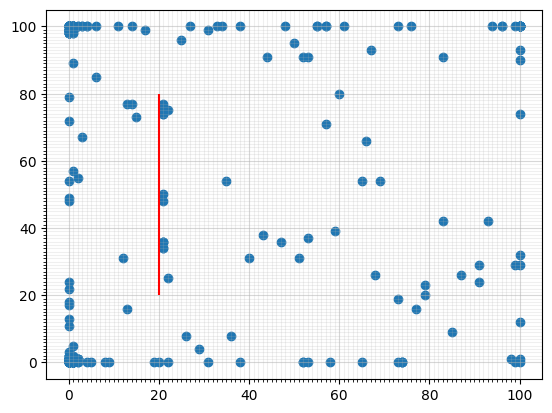

GEN 130


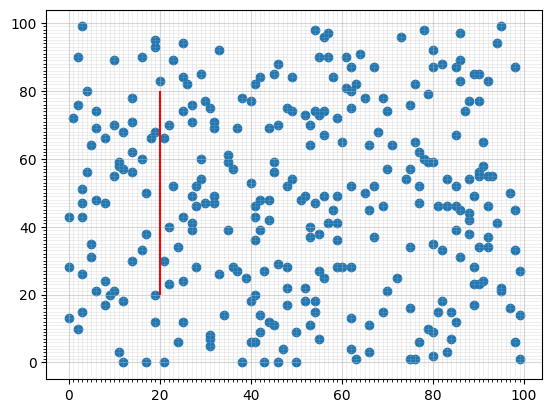

STEP 150


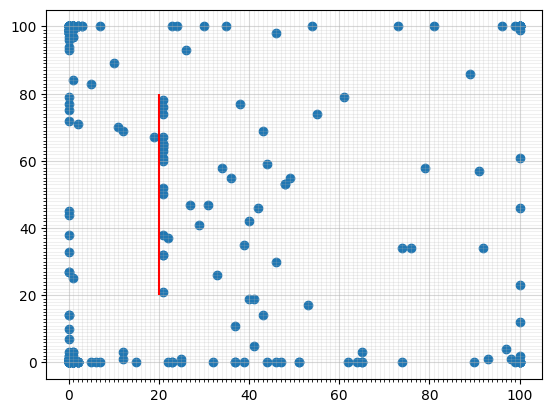

STEP 299


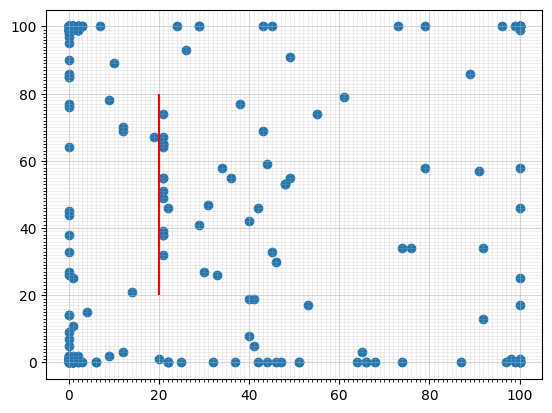

GEN 135


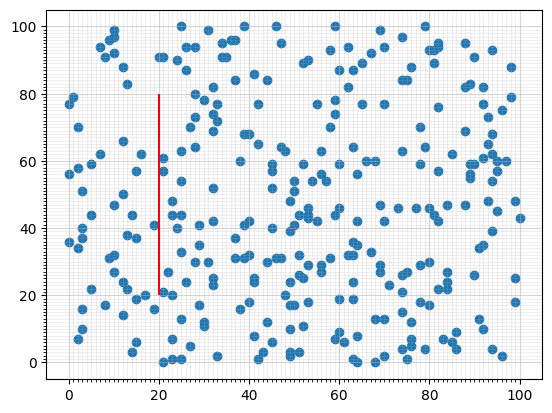

STEP 150


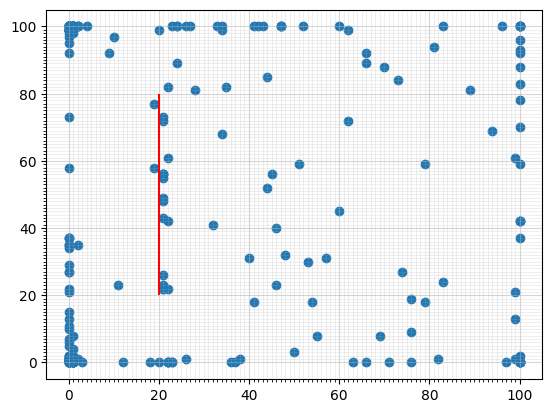

STEP 299


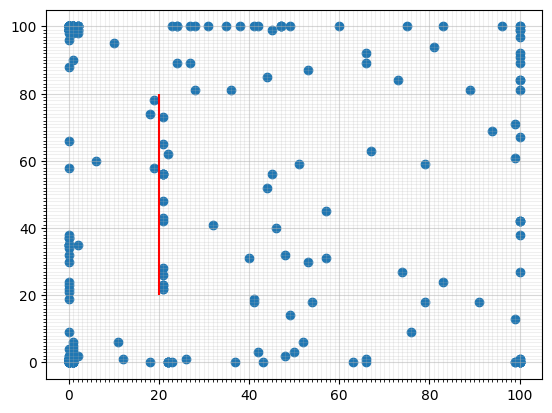

GEN 140


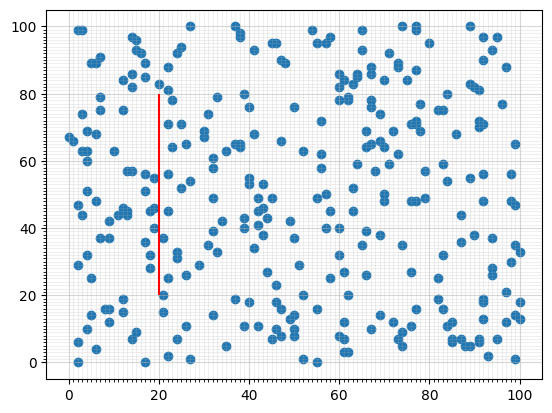

STEP 150


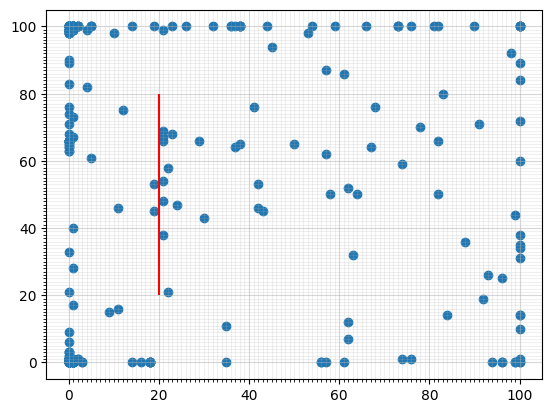

STEP 299


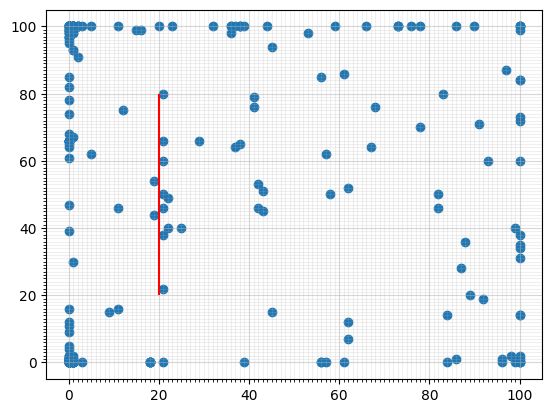

GEN 145


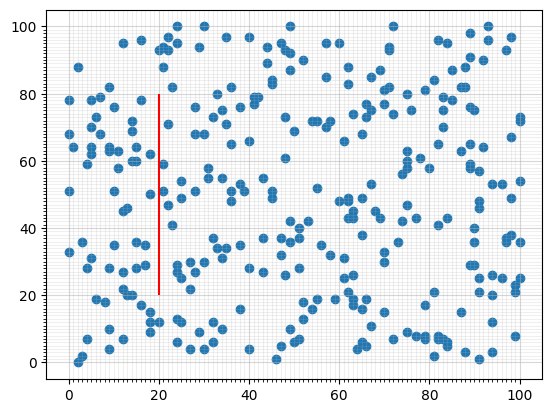

STEP 150


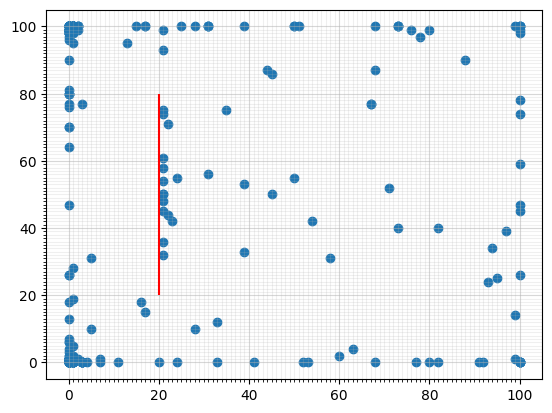

STEP 299


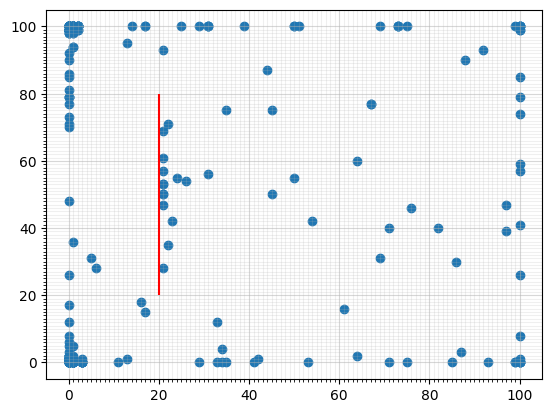

GEN 150


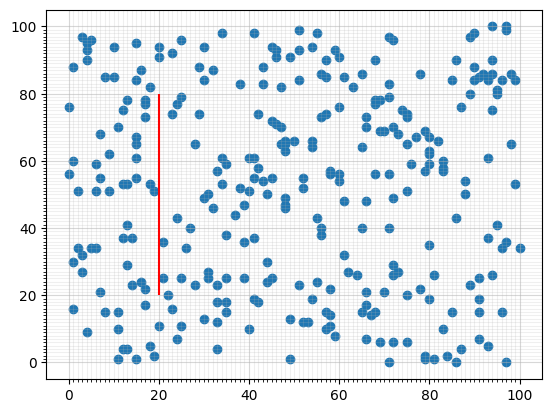

STEP 150


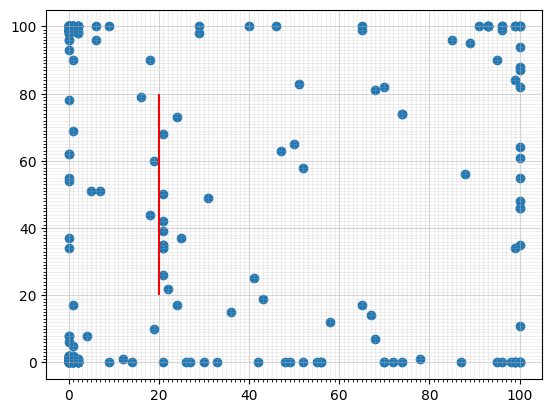

STEP 299


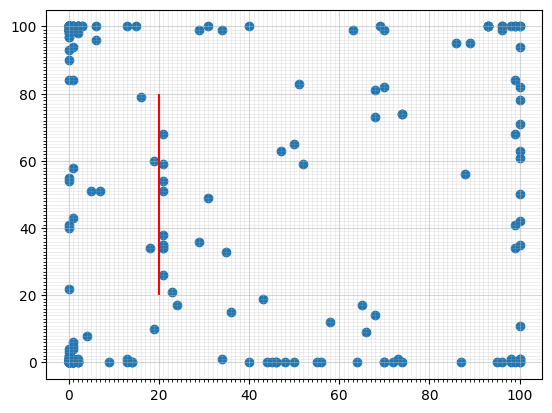

GEN 155


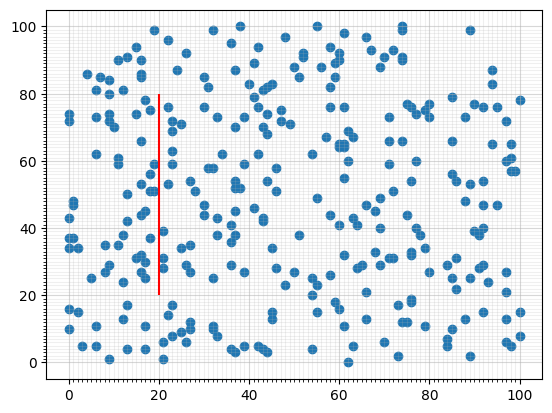

STEP 150


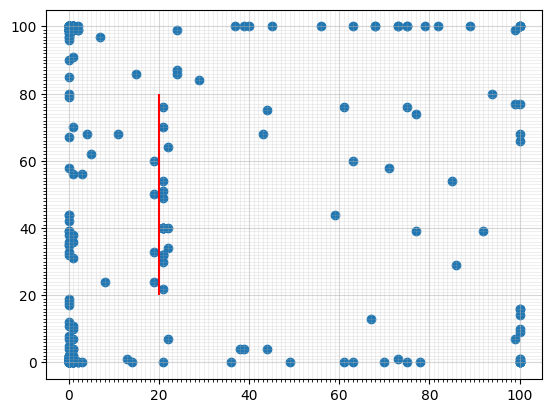

STEP 299


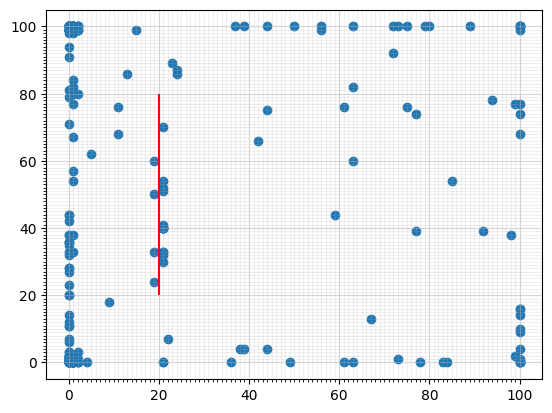

GEN 160


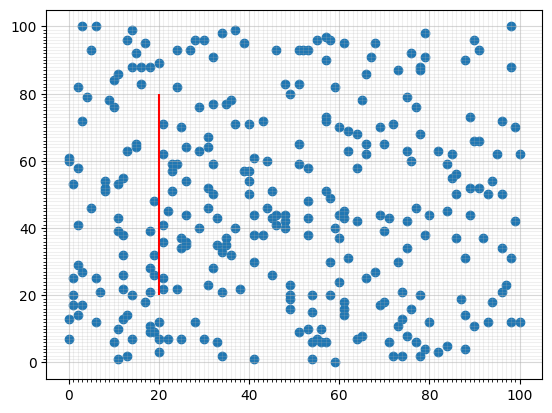

STEP 150


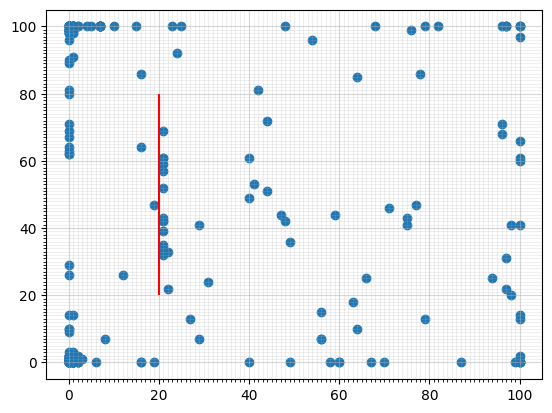

STEP 299


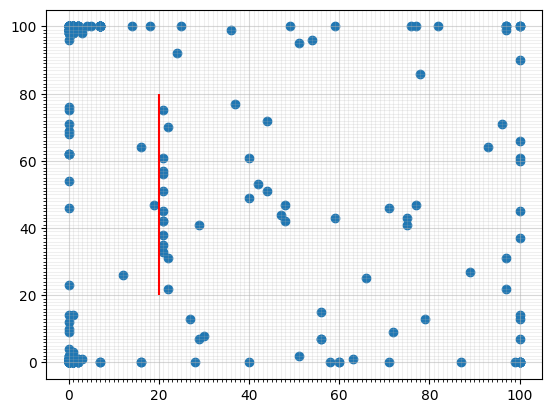

GEN 165


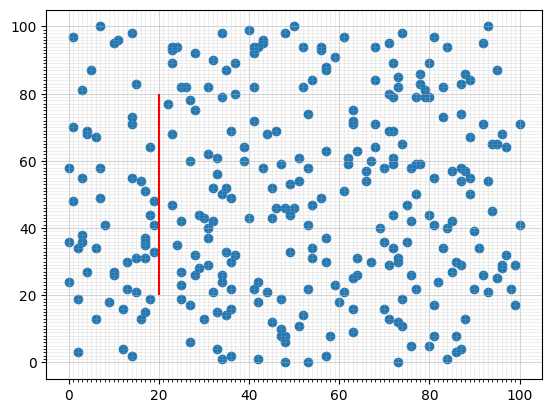

STEP 150


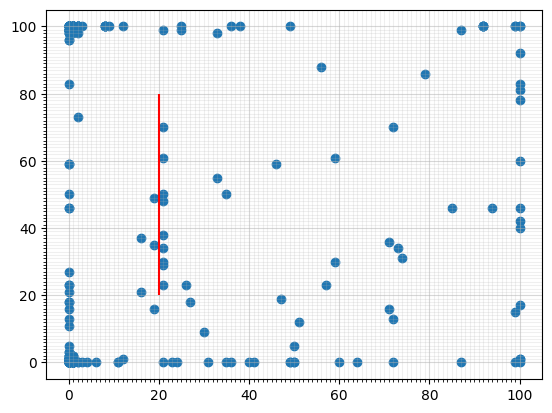

STEP 299


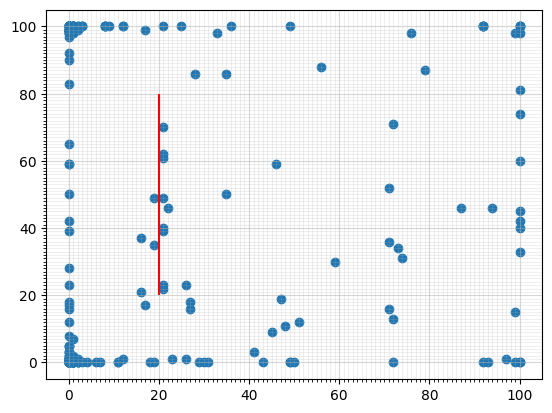

GEN 170


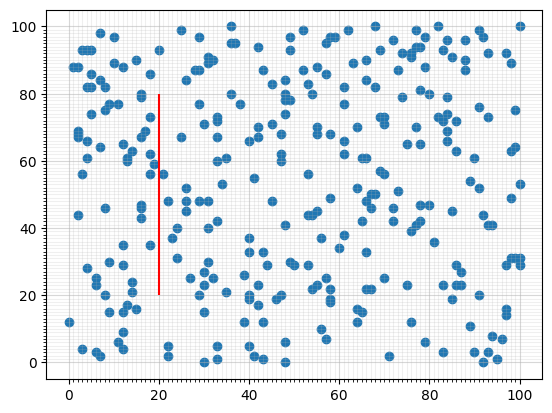

STEP 150


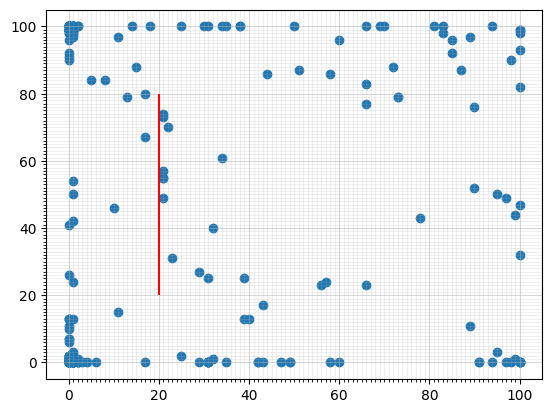

STEP 299


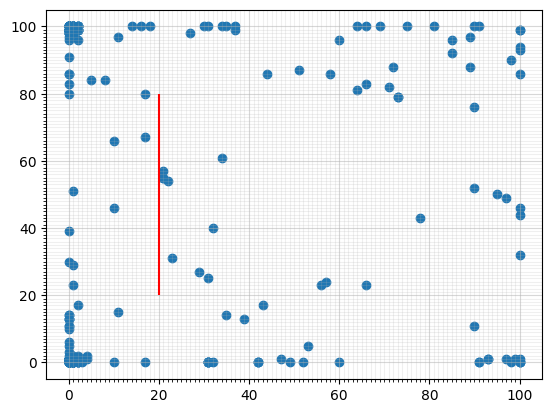

GEN 175


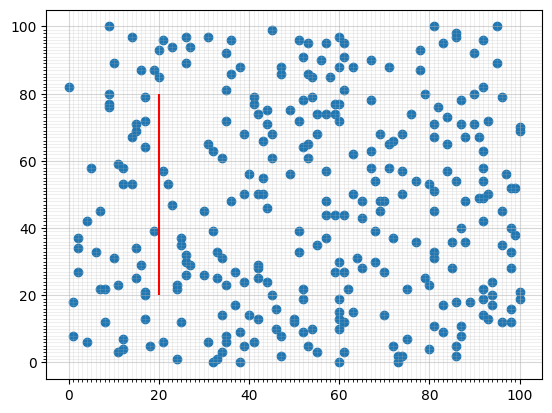

STEP 150


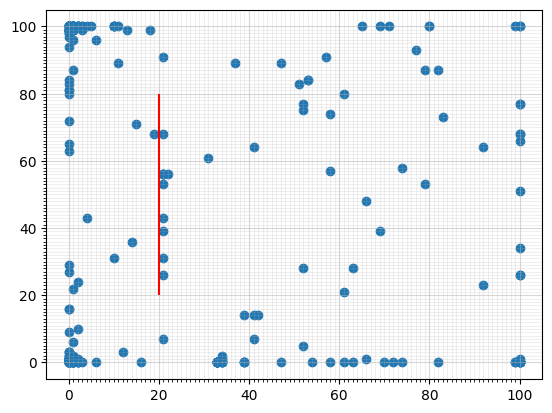

STEP 299


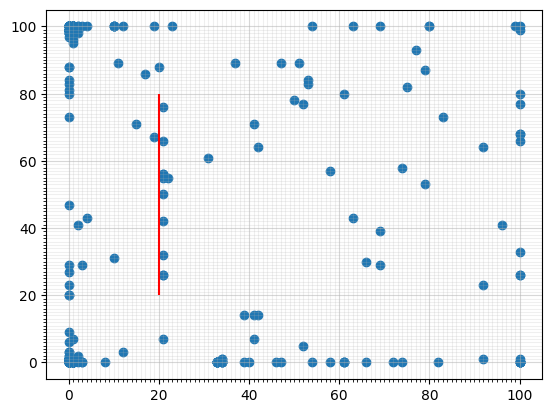

GEN 180


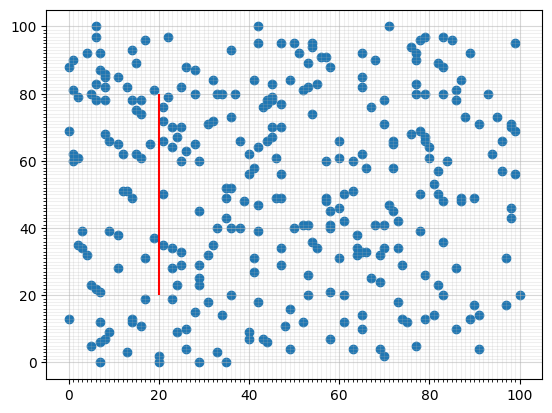

STEP 150


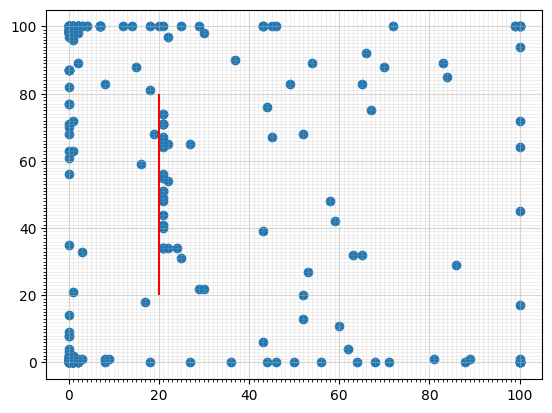

STEP 299


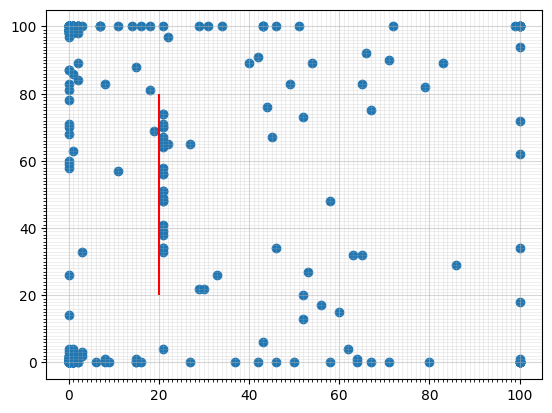

GEN 185


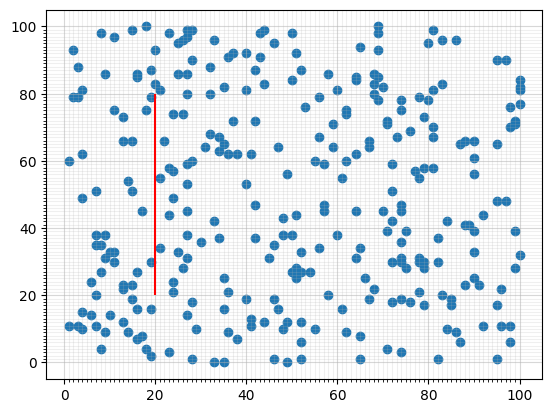

STEP 150


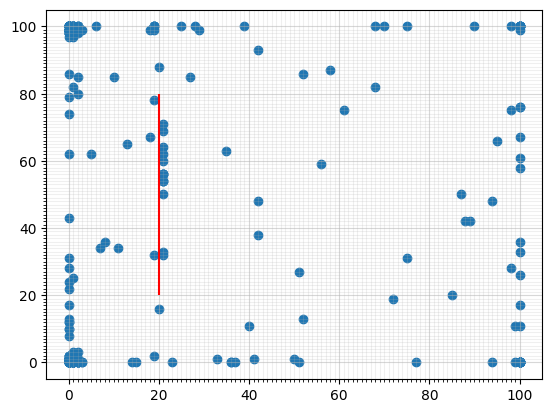

STEP 299


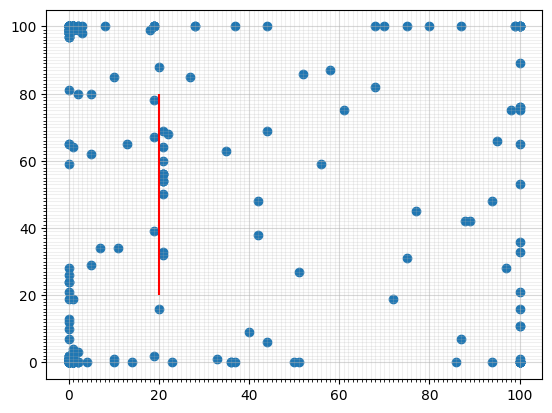

GEN 190


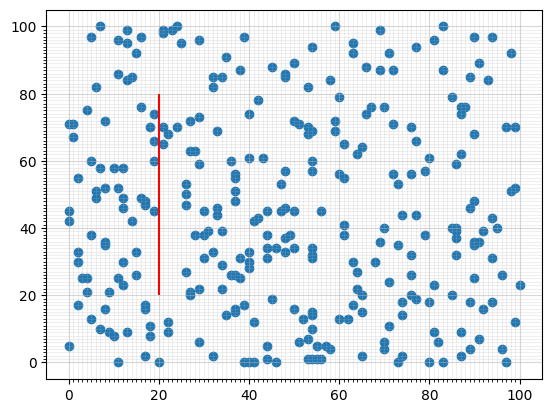

STEP 150


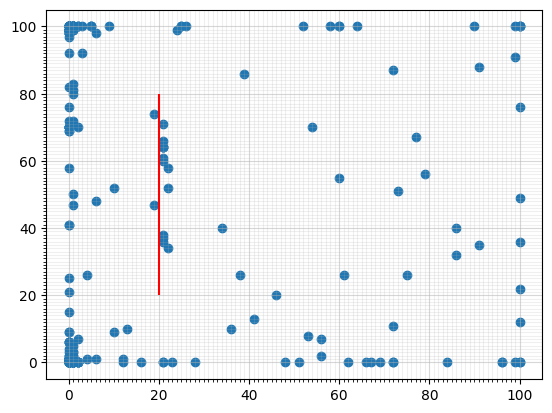

STEP 299


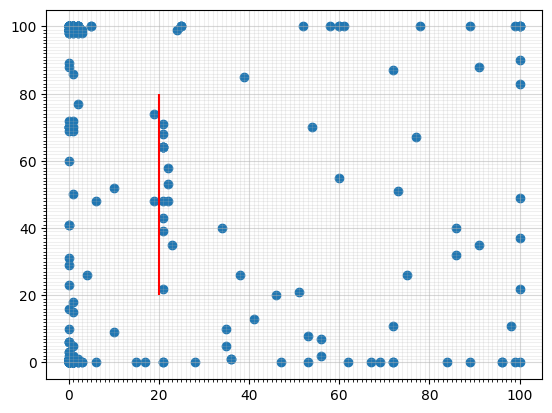

GEN 195


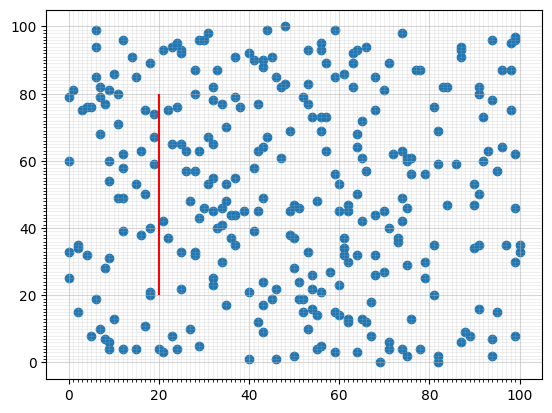

STEP 150


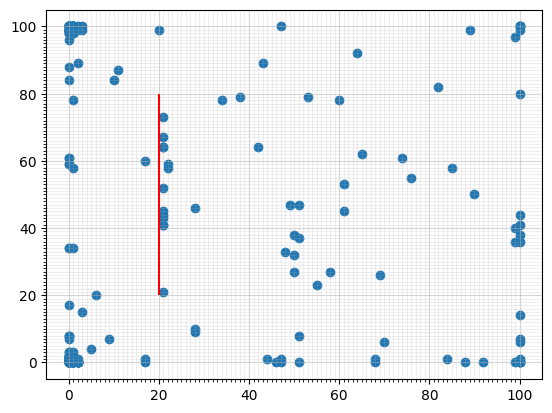

STEP 299


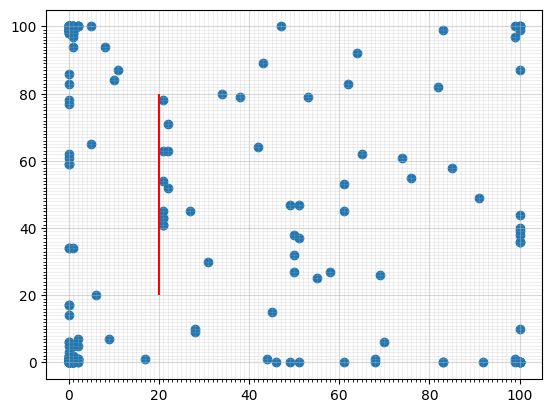

GEN 200


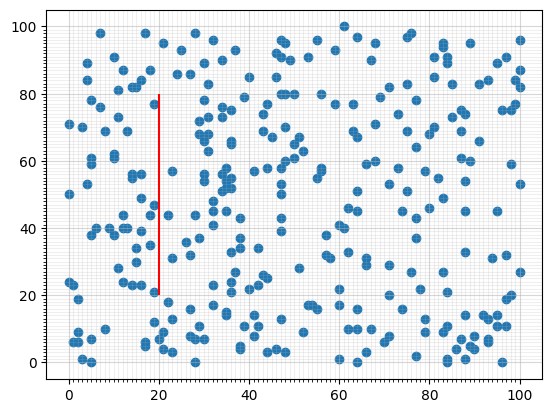

STEP 150


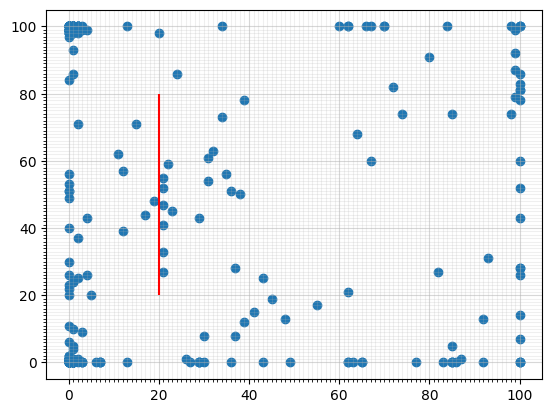

STEP 299


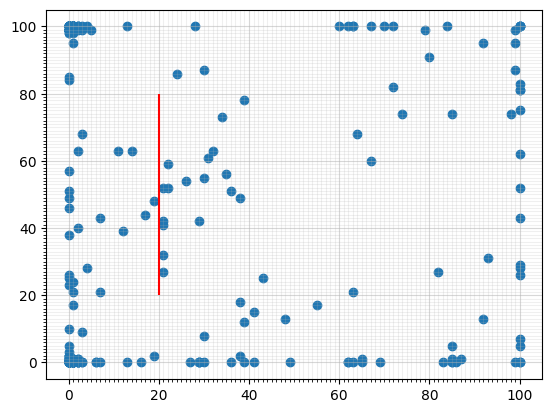

GEN 205


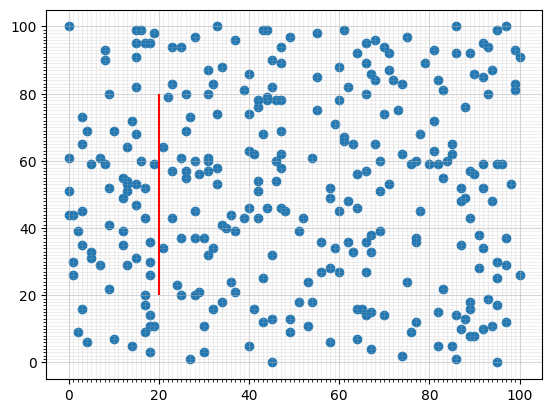

STEP 150


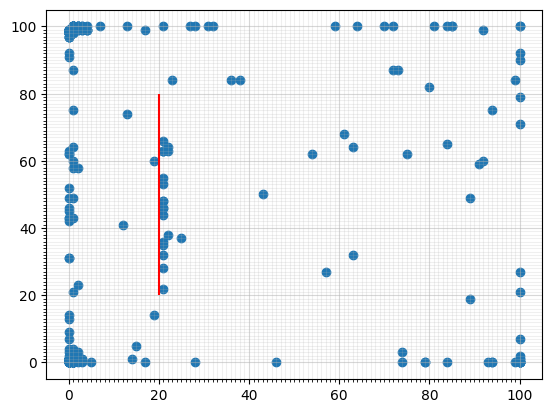

STEP 299


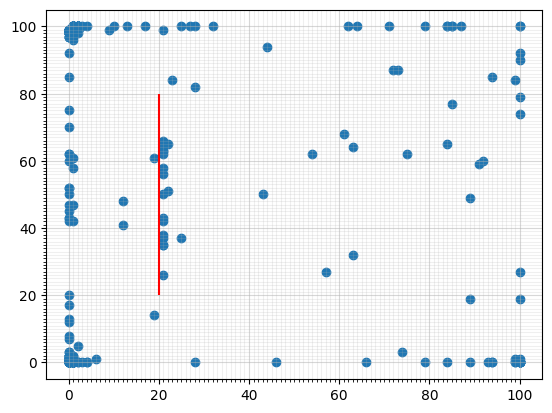

GEN 210


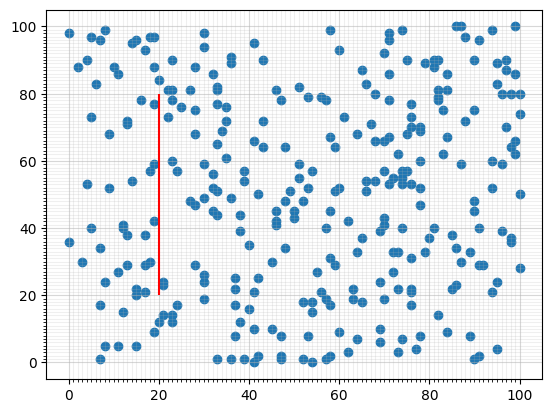

STEP 150


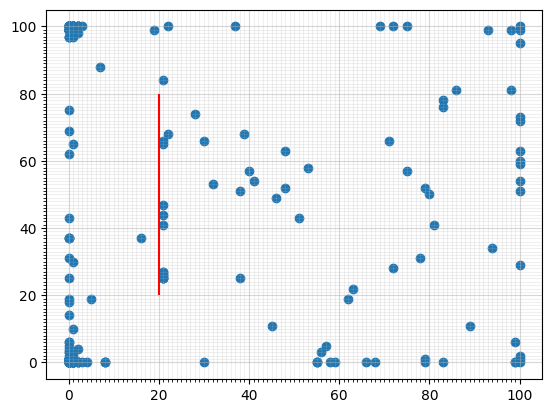

STEP 299


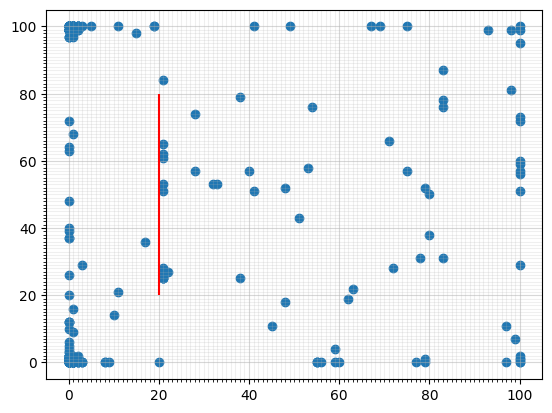

GEN 215


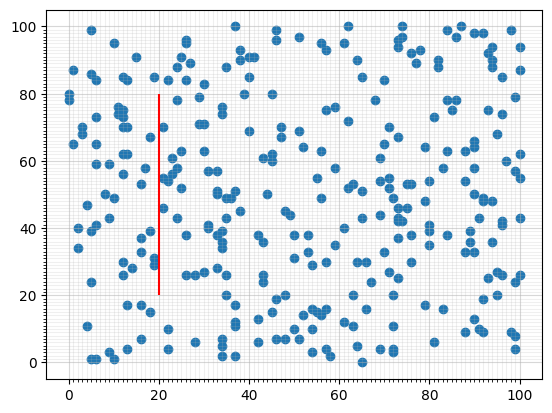

STEP 150


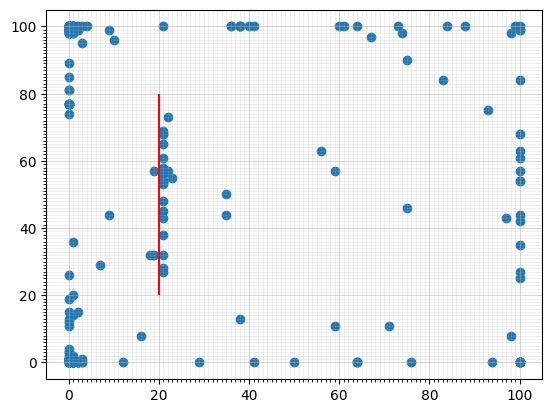

STEP 299


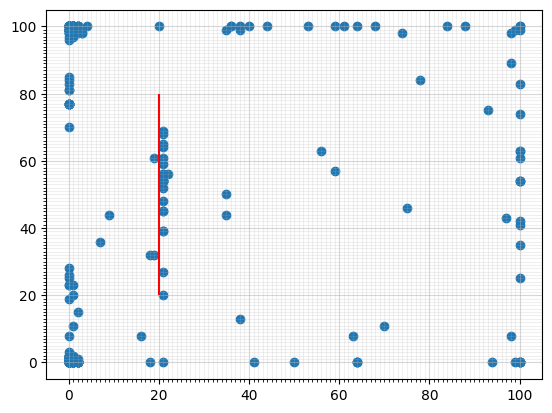

GEN 220


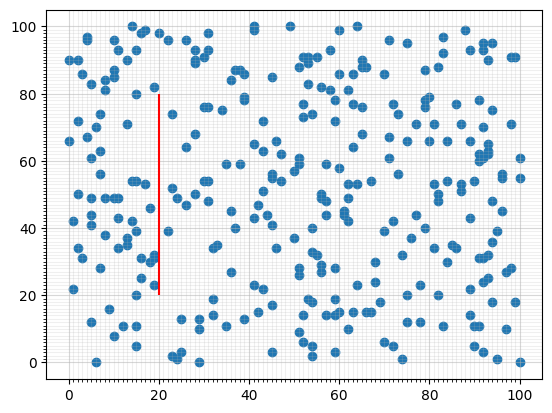

STEP 150


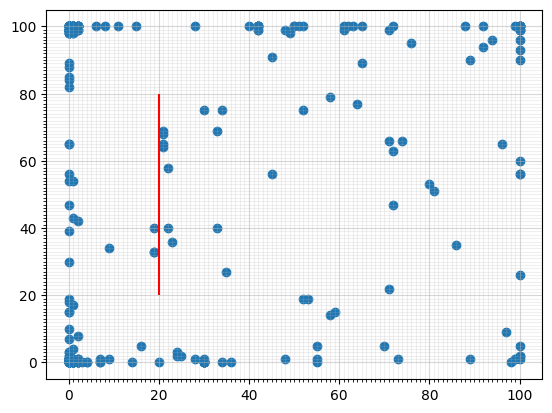

STEP 299


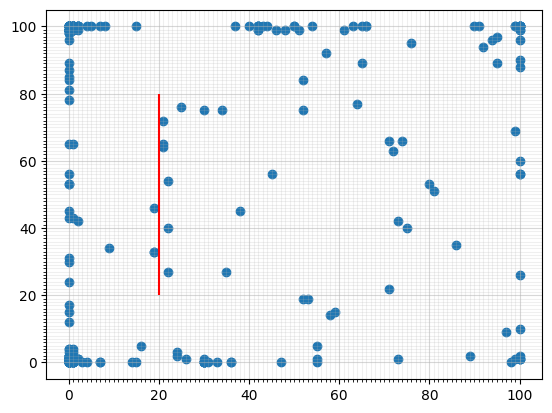

GEN 225


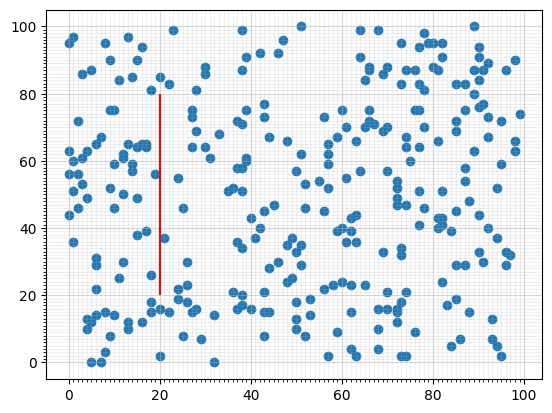

STEP 150


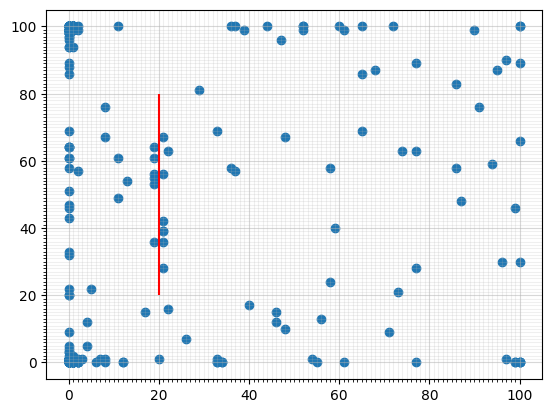

STEP 299


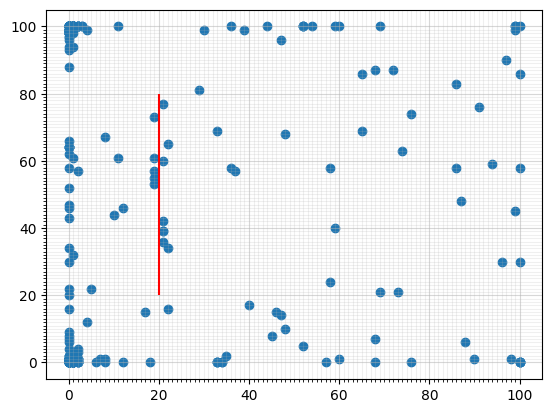

GEN 230


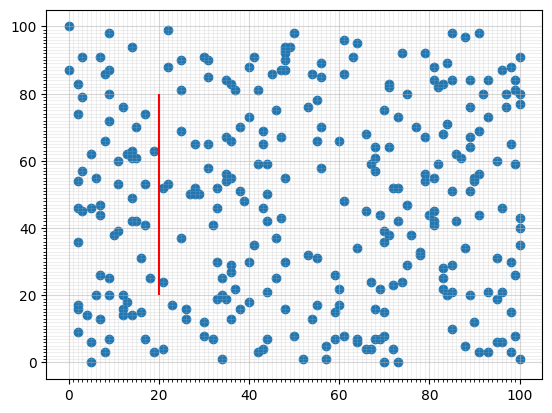

STEP 150


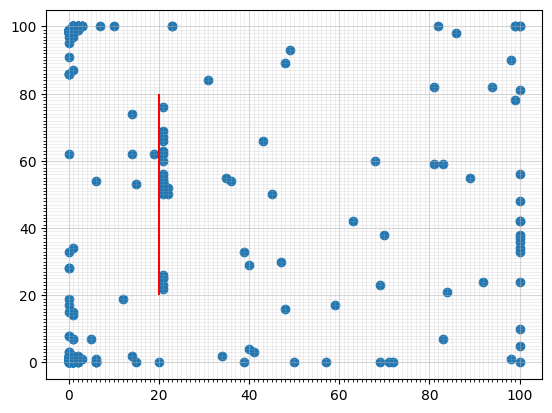

STEP 299


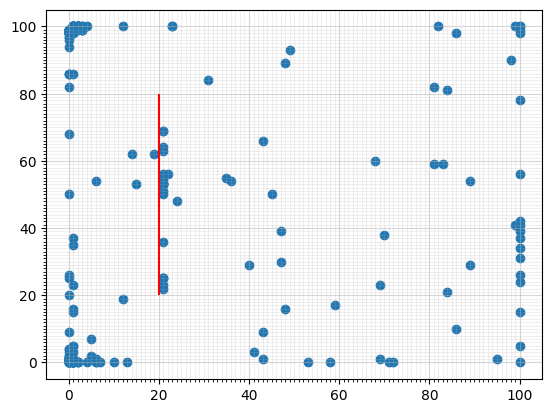

GEN 235


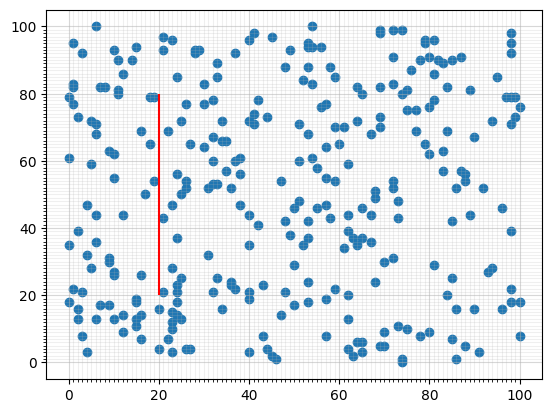

STEP 150


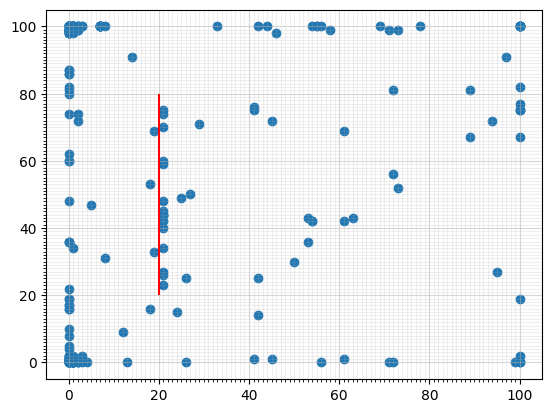

STEP 299


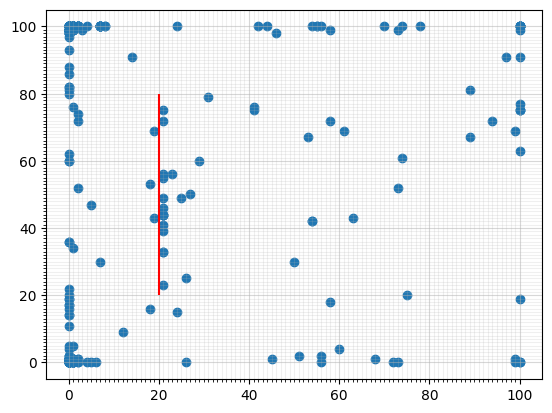

GEN 240


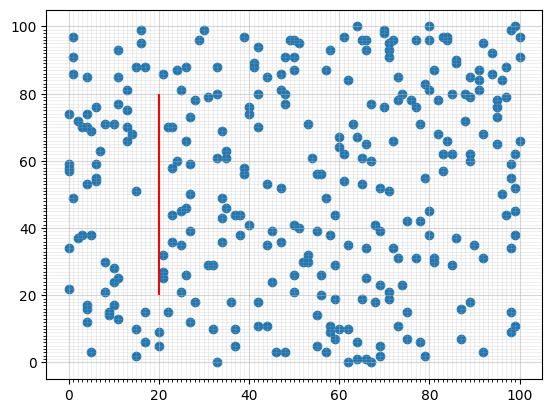

STEP 150


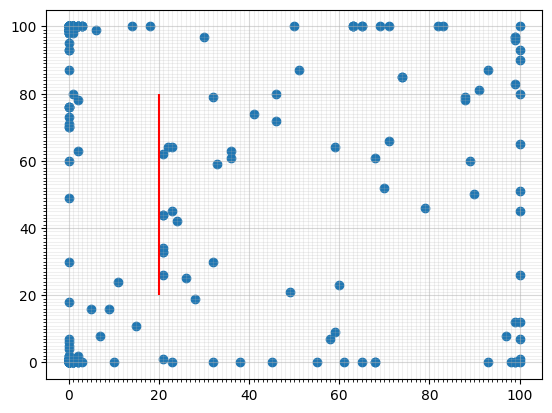

STEP 299


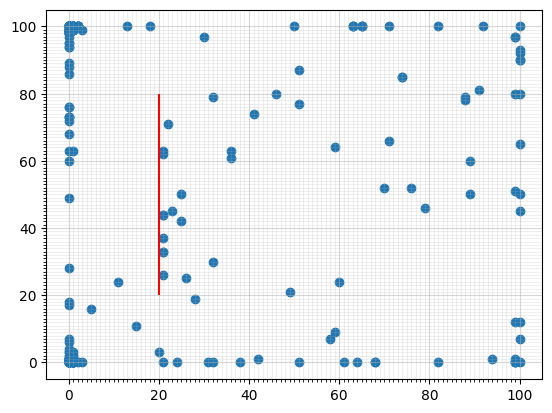

GEN 245


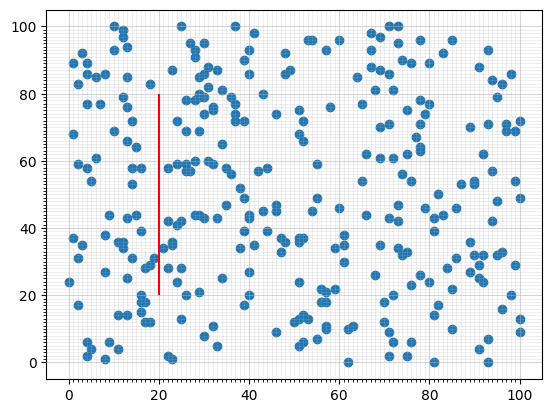

STEP 150


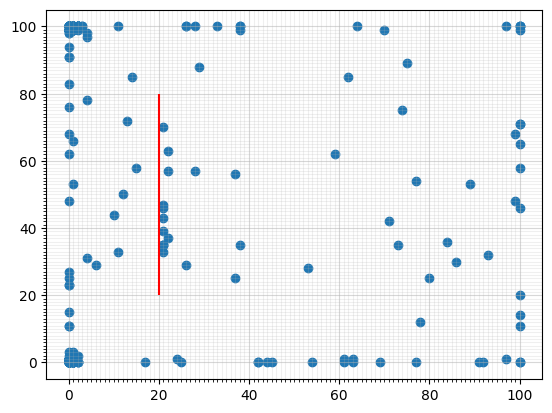

STEP 299


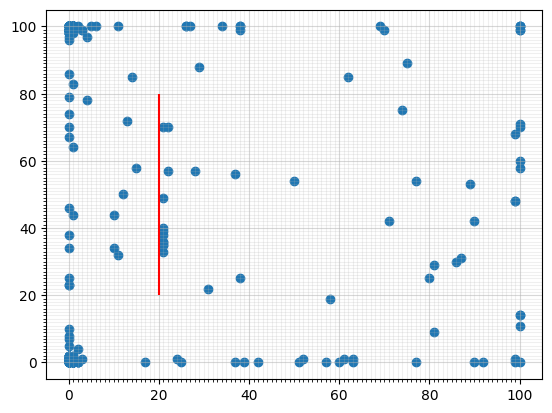

GEN 250


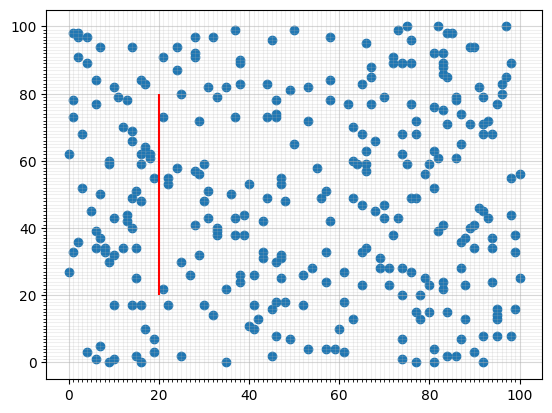

STEP 150


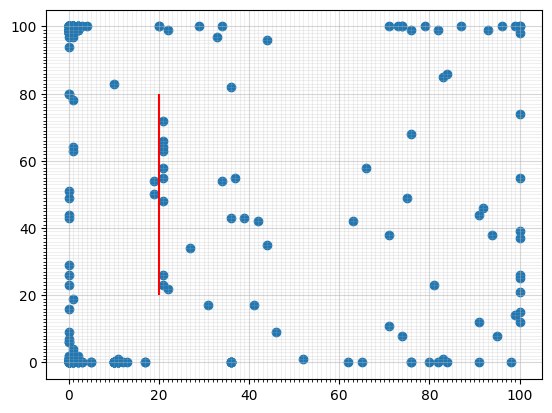

STEP 299


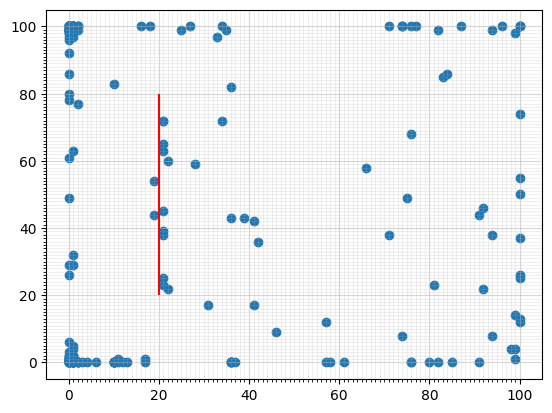

GEN 255


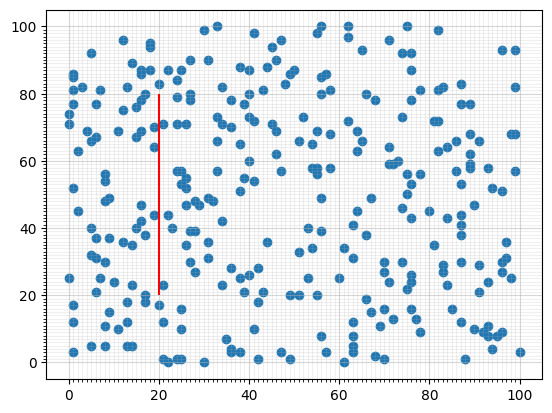

STEP 150


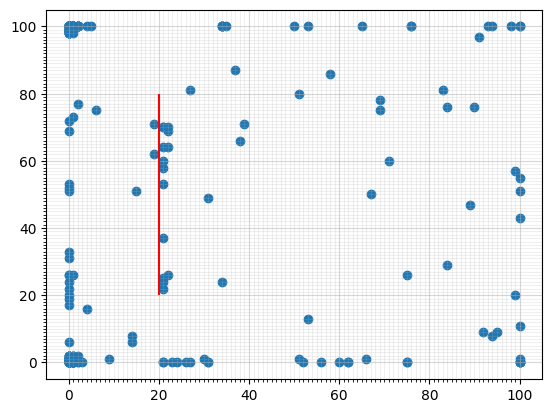

STEP 299


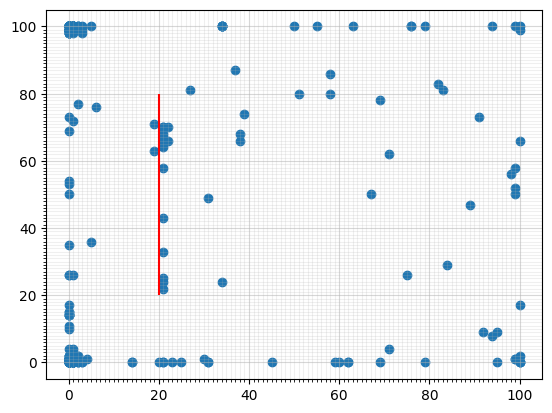

GEN 260


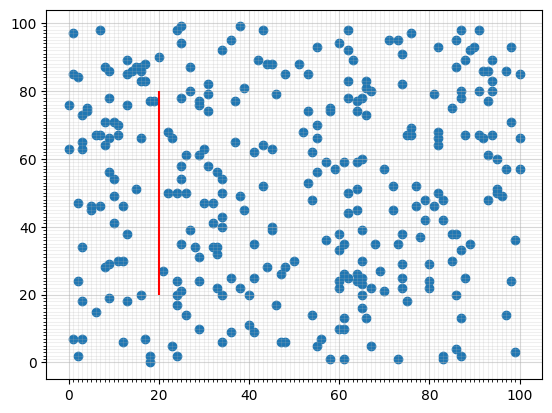

STEP 150


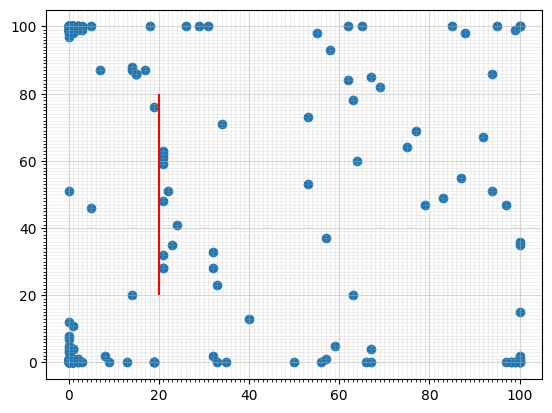

STEP 299


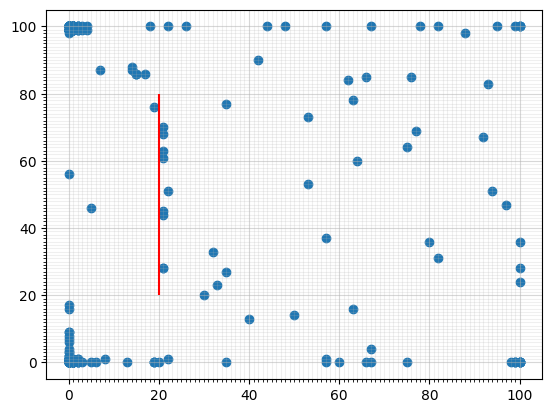

GEN 265


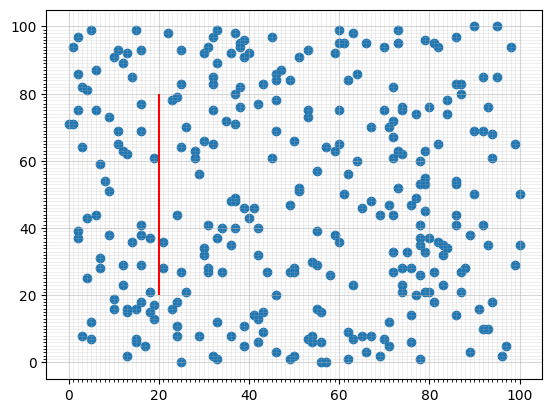

STEP 150


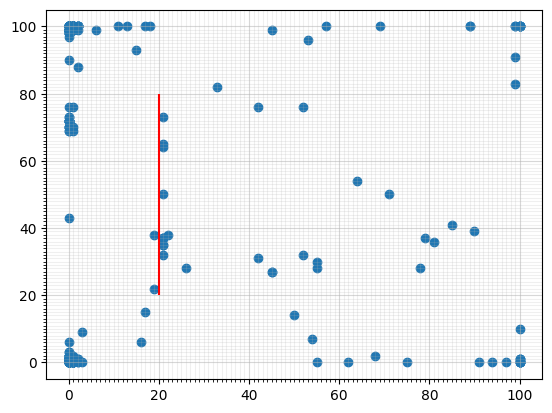

STEP 299


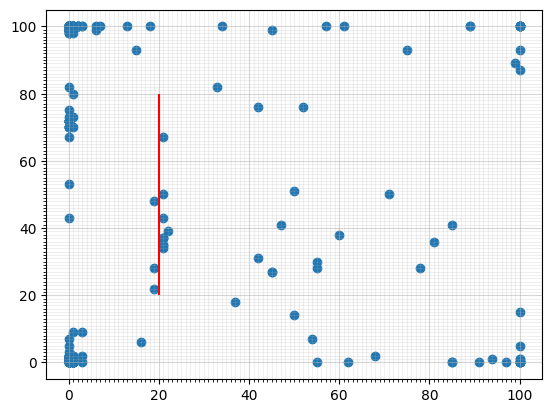

GEN 270


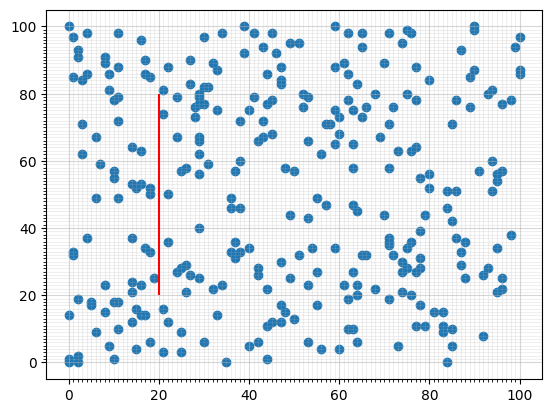

STEP 150


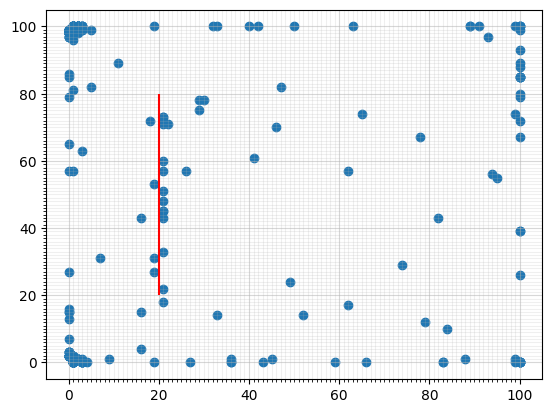

STEP 299


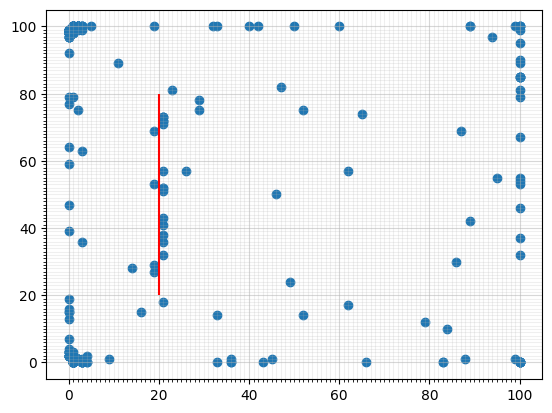

GEN 275


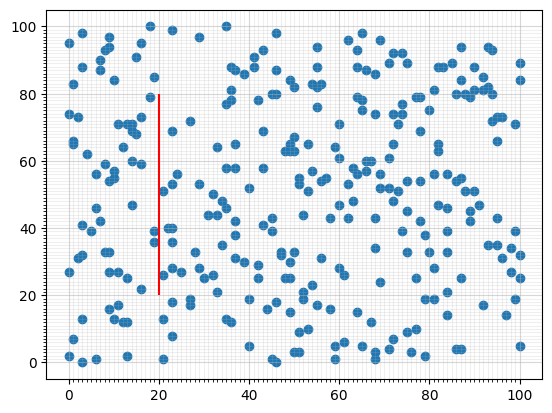

STEP 150


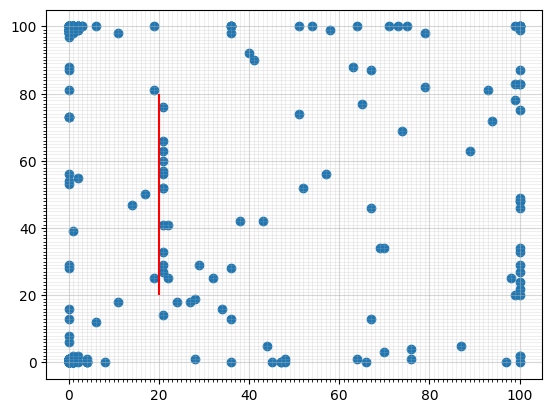

STEP 299


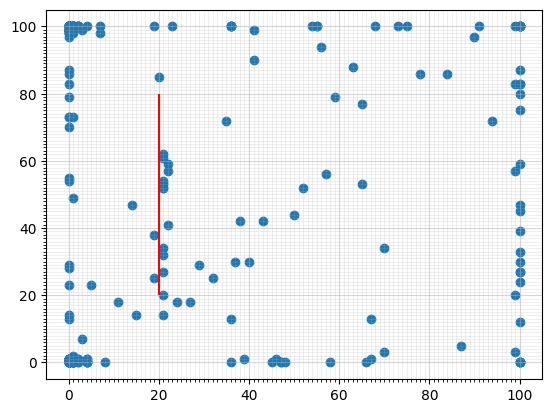

GEN 280


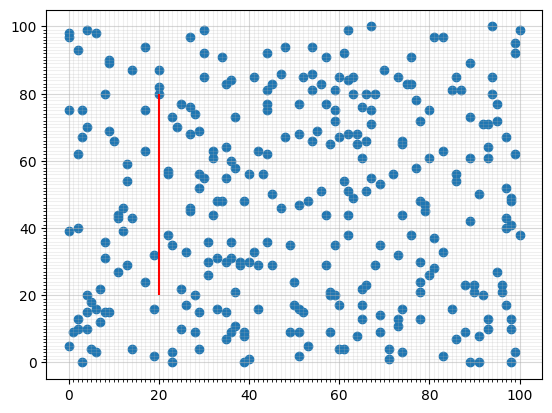

STEP 150


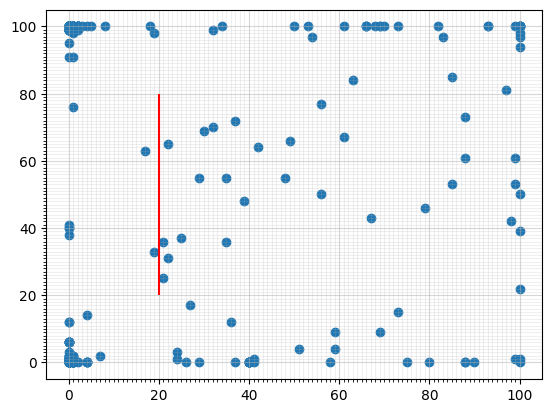

STEP 299


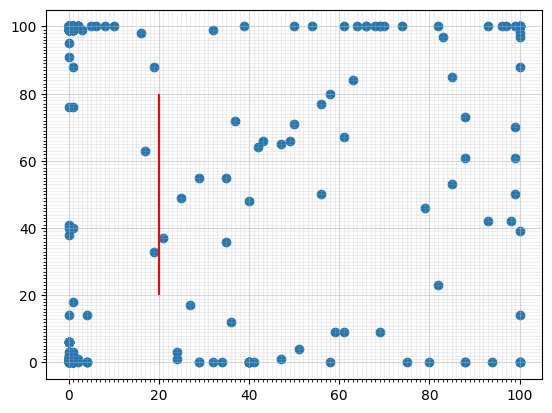

GEN 285


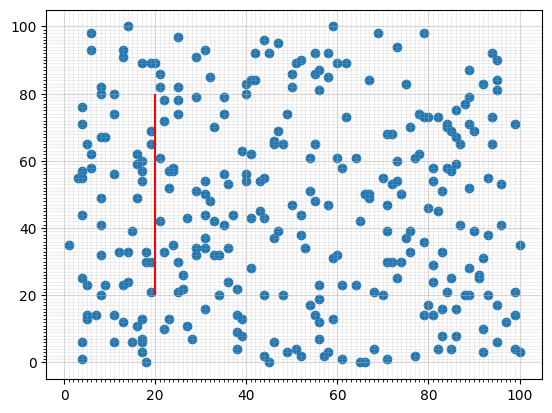

STEP 150


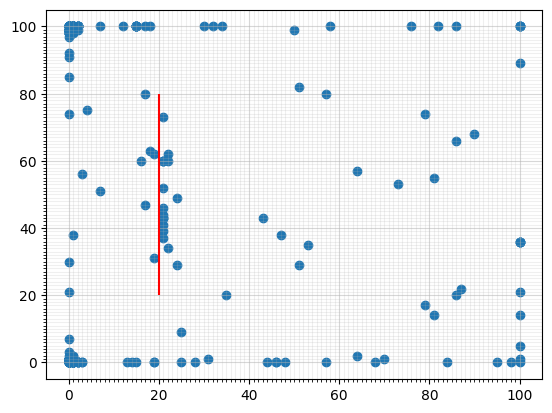

STEP 299


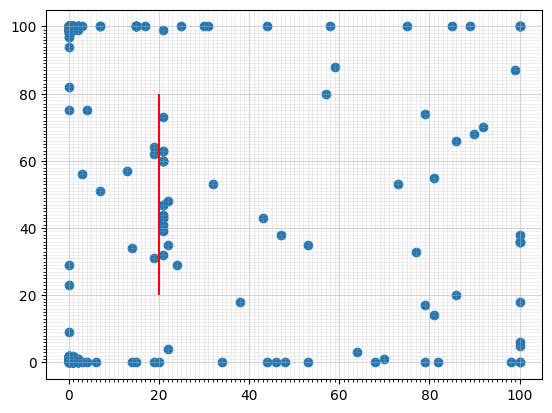

GEN 290


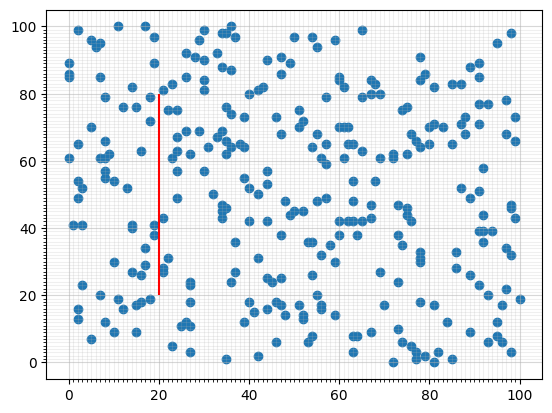

STEP 150


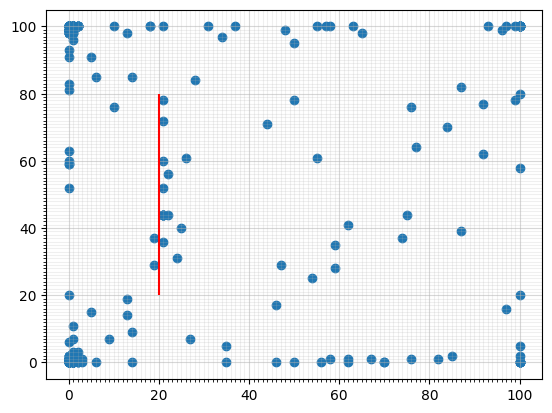

STEP 299


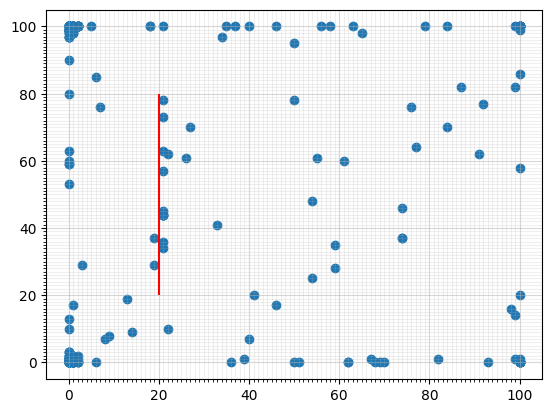

GEN 295


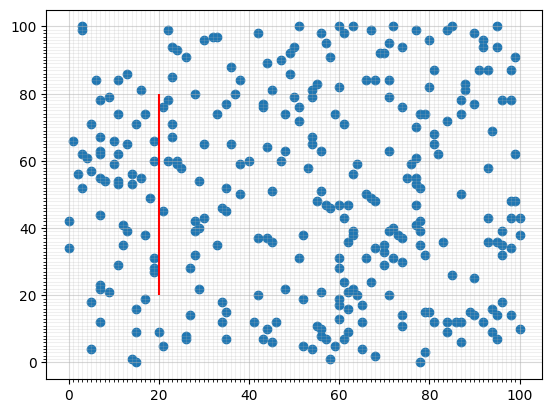

STEP 150


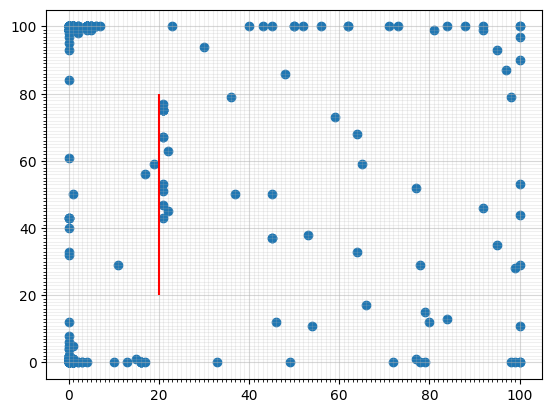

STEP 299


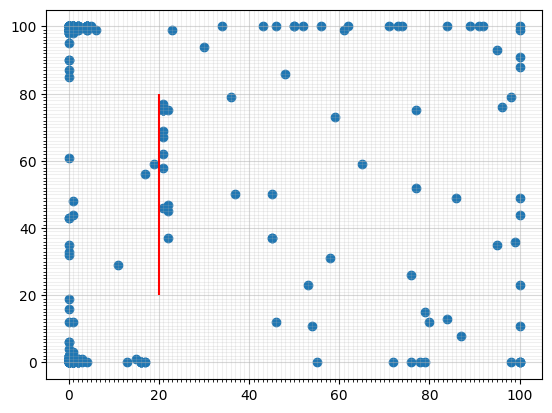

In [36]:
#ALL TOGETHER

for i in range(300):
    
    if i < 50:
        New_Gen(0)
        if i % 5 == 0:
            print("GEN " + str(i))
            Create_Map(0)
        for j in range(Steps):
            Execute_Neurons()
            if (j == 150 or j == 299) and i % 5 == 0:
                print("STEP " + str(j))
                Create_Map(0)
    elif i >= 50:
        New_Gen(1)
        if i % 5 == 0:
            print("GEN " + str(i))
            Create_Map(1)
        for j in range(Steps):
            Execute_Neurons()
            if (j == 150 or j == 299) and i % 5 == 0:
                print("STEP " + str(j))
                Create_Map(1)
    if i % 5 == 0:
        with open('Documentation0.txt', 'a') as f:
            f.write("GEN " + str(i))
            f.write("\n")
            f.write(str(Current_Gen))
            f.write("\n")
            Mutated = 0
            for j in Current_Gen:
                if Current_Gen[j]["Mutation"] == 1:
                    Mutated += 1
            f.write("MUTATIONS IN " + str(Mutated))
            f.write("\n")
            f.close()
    Kill_Noobs()
    if i % 5 == 0:
        with open('Documentation0.txt', 'a') as f:
            f.write("SURVIVED " + str(len(Current_Gen)))
            f.write(str(Current_Gen))
            f.write("\n")
            Mutated_Survived = 0
            for j in Current_Gen:
                if Current_Gen[j]["Mutation"] == 1:
                    Mutated_Survived += 1
            f.write("Mutated and survived " + str(Mutated_Survived))
            f.write("\n")
            f.write("Mutated and died " + str(Mutated - Mutated_Survived))
            f.write("\n")
            f.write("Unutated and survived " + str(len(Current_Gen) - Mutated_Survived))
            f.write("\n")
            f.write("Unmutated and died " + str(300 - (len(Current_Gen)+(Mutated - Mutated_Survived))))
            f.write("\n")
            f.close()